## Arno's engram-es keyboard layout

Engram-es is a key layout optimized for comfortable and efficient touch typing in Spanish 
created by [Arno Klein](https://binarybottle.com), 
with [open source code](https://github.com/binarybottle/engram-es),
based on the original English Engram [open source code](https://github.com/binarybottle/engram).
<!-- You can install the engram-es layout on [Windows, macOS, and Linux](https://keyman.com/keyboards/engram)
or [try it out online](https://keymanweb.com/#en,Keyboard_engram).-->
An article is under review (see the [preprint](https://www.preprints.org/manuscript/202103.0287/v1) that describes the approach).

Letters are optimally arranged according to ergonomics factors that promote reduction of lateral finger movements and more efficient typing of high-frequency letter pairs. The most common punctuation marks are logically grouped together in the middle columns and numbers are paired with mathematical and logic symbols (shown as pairs of default and Shift-key-accessed characters).

<!--
         [{ 1| 2= 3~ 4+  5<  6>  7^ 8& 9% 0* ]} /\
            bB yY oO uU  '(  ")  lL dD wW VV zZ #$ @`
            cC iI eE aA  ,;  .:  hH tT sS nN qQ 
            gG xX jJ kK  -_  ?!  rR MM fF pP            
-->

See below for a full description and comparisons with other key layouts.

<!-- ### Standard diagonal keyboard (default and Shift-key layers)
![Standard keyboard](https://github.com/binarybottle/engram/blob/master/assets/engram-800px.png?raw=true)

### "Ergonomic" orthonormal keyboard (default and Shift-key layers)
![Orthonormal keyboard](https://github.com/binarybottle/engram/blob/master/assets/engram-ergo-squeezed-800px.png?raw=true) -->

(c) 2021 Arno Klein, MIT license

----------------

# Contents
1. [Why a new keyboard layout?](#why)
2. [Guiding criteria](#criteria)
3. Setup:
    - [Dependencies and functions](#import)
    - [Speed matrix](#speed)
    - [Strength matrix](#strength)
    - [Flow matrix and Engram scoring model](#flow)
4. Steps:
    - [Step 1: Define the shape of the key layout to minimize lateral finger movements](#step1)
    - [Step 2: Arrange the most frequent letters based on comfort and bigram frequencies](#step2)
    - [Step 3: Optimize assignment of the remaining letters](#step3)
    - [Step 4: Evaluate winning layout](#step4)
    - [Step 5: Arrange non-letter characters in easy-to-remember places](#step5)

## Why a new keyboard layout? <a name="why">

**Personal history** <br>
In the future, I hope to include an engaging rationale for why I took on this challenge.
Suffice to say I love solving problems, and I have battled repetitive strain injury 
ever since I worked on an old DEC workstation at the MIT Media Lab while composing 
my thesis back in the 1990s.
I have experimented with a wide variety of human interface technologies over the years --
voice dictation, one-handed keyboard, keyless keyboard, foot mouse, and ergonomic keyboards 
like the Kinesis Advantage and [Ergodox](https://configure.ergodox-ez.com/ergodox-ez/layouts/APXBR/latest/0) keyboards with different key switches.
While these technologies can significantly improve comfort and reduce strain, 
if you have to type on a keyboard, it can only help to use a key layout optimized according to sound ergonomics principles. 

**Why "Engram"?** <br>
The name is a pun, referring both to "n-gram", letter permutations and their frequencies that are used to compute the Engram layout, and "engram", or memory trace, the postulated change in neural tissue to account for the persistence of memory, as a nod to my attempt to make this layout easy to remember.

## Guiding criteria   <a name="criteria">

    1.  Assign letters to keys that don't require lateral finger movements.
    2.  Promote alternating between hands over uncomfortable same-hand transitions.
    3.  Assign the most common letters to the most comfortable keys.
    4.  Arrange letters so that more frequent bigrams are easier to type.
    5.  Promote little-to-index-finger roll-ins over index-to-little-finger roll-outs.
    6.  Balance finger loads according to their relative strength.
    7.  Avoid stretching shorter fingers up and longer fingers down.
    8.  Avoid using the same finger.
    9.  Avoid skipping over the home row.
    10. Assign the most common punctuation to keys in the middle of the keyboard.
    11. Assign easy-to-remember symbols to the Shift-number keys.
    
### Factors used to compute the Engram layout <a name="factors">
  - [Spanish letter and bigram frequency data](http://practicalcryptography.com/cryptanalysis/letter-frequencies-various-languages/spanish-letter-frequencies/)
    <br>
  - **Flow factors** (transitions between ordered key pairs) <br>
    These factors are influenced by Dvorak's 11 criteria (1936).

### Import dependencies and functions  <a name="import">

In [1]:
# %load code/engram_variables.py
# Print .png figures and .txt text files
print_output = False # True

# Apply strength data
apply_strength = True
min_strength_factor = 0.9

letters24 = ['E','A','O','S','N','I','R','L','D','C','T','U','P',
             'M','B','G','V','Q','H','F','Y','J','Z','X','K','W']
keys24 = [1,2,3,4, 5,6,7,8, 9,10,11,12, 13,14,15,16, 17,18,19,20, 21,22,23,24]
instances24 = [10912000, 10301872, 7398419, 6128524, 5838540, 5694616, 5450913, 
               4808679, 4237020, 3648080, 3643515, 3292410, 2266539, 2152702, 
               1042859, 964043, 811441, 686200, 670756, 652415, 651259, 374173, 
               344877, 153120, 64167, 26492]
max_frequency = 10912000
instances_denominator = 100000

# Establish which layouts are within a small difference of the top-scoring layout 
# (the smallest difference between two penalties, 0.9^8 - 0.9^9, in one of 24^2 key pairs):
delta = 0.9**8 - 0.9**9
factor24 = ((24**2 - 1) + (1-delta)) / (24**2)
factor32 = ((32**2 - 1) + (1-delta)) / (32**2)

# Establish which layouts are within a small difference of each other when using the speed matrix. 
# We define an epsilon equal to 13.158 ms for a single bigram (of the 32^2 possible bigrams), 
# where 13.158 ms is one tenth of 131.58 ms, the fastest measured digraph tapping speed (30,000/228 = 131.58 ms) 
# recorded in the study: "Estimation of digraph costs for keyboard layout optimization", 
# A Iseri, Ma Eksioglu, International Journal of Industrial Ergonomics, 48, 127-138, 2015.
#data_matrix_speed = Speed32x32
#time_range = 243  # milliseconds
#norm_range = np.max(data_matrix_speed) - np.min(data_matrix_speed)  # 0.6535662299854439
#ms_norm = norm_range / time_range  # 0.0026895729629030614
#epsilon = 131.58/10 * ms_norm / (32**2)
epsilon    = 0.00003549615849447514

In [2]:
# %load code/engram_functions.py
# Import dependencies
import xlrd
import numpy as np
from sympy.utilities.iterables import multiset_permutations
import matplotlib
import matplotlib.pyplot as plt    
import seaborn as sns


def permute_optimize_keys(fixed_letters, fixed_letter_indices, open_letter_indices, 
                          all_letters, keys, data_matrix, bigrams, bigram_frequencies, 
                          min_score=0, verbose=False):
    """
    Find all permutations of letters, optimize layout, and generate output.
    """
    matrix_selected = select_keys(data_matrix, keys, verbose=False) 
    
    unassigned_letters = []
    for all_letter in all_letters:
        if all_letter not in fixed_letters:
            unassigned_letters.append(all_letter)
            if len(unassigned_letters) == len(open_letter_indices):
                break

    letter_permutations = permute_letters(unassigned_letters, verbose)
    if verbose:
        print("{0} permutations".format(len(letter_permutations)))
    top_permutation, top_score = optimize_layout(np.array([]), matrix_selected, bigrams, bigram_frequencies, 
                                                 letter_permutations, open_letter_indices, 
                                                 fixed_letters, fixed_letter_indices, min_score, verbose)
    
    return top_permutation, top_score, letter_permutations


def permute_optimize(starting_permutation, letters, all_letters, all_keys, 
                     data_matrix, bigrams, bigram_frequencies, min_score=0, verbose=False):
    """
    Find all permutations of letters, optimize layout, and generate output.
    """
    matrix_selected = select_keys(data_matrix, all_keys, verbose=False)
    open_positions = []
    fixed_positions = [] 
    open_letters = []
    fixed_letters = []
    assigned_letters = []
    for iletter, letter in enumerate(letters):
        if letter.strip() == "":
            open_positions.append(iletter)
            for all_letter in all_letters:
                if all_letter not in letters and all_letter not in assigned_letters:
                    open_letters.append(all_letter)
                    assigned_letters.append(all_letter)
                    break
        else:
            fixed_positions.append(iletter)
            fixed_letters.append(letter)

    letter_permutations = permute_letters(open_letters, verbose)
    if verbose:
        print("{0} permutations".format(len(letter_permutations)))
    top_permutation, top_score = optimize_layout(starting_permutation, matrix_selected, bigrams, 
                                                 bigram_frequencies, letter_permutations, open_positions, 
                                                 fixed_letters, fixed_positions, min_score, verbose)
        
    return top_permutation, top_score


def select_keys(data_matrix, keys, verbose=False):
    """
    Select keys to quantify pairwise relationships.
    """
    # Extract pairwise entries for the keys:
    nkeys = len(keys)
    Select = np.zeros((nkeys, nkeys))
    u = 0
    for i in keys:
        u += 1
        v = 0
        for j in keys:
            v += 1
            Select[u-1,v-1] = data_matrix[i-1,j-1]

    # Normalize matrix with min-max scaling to a range with max 1:
    newMin = np.min(Select) / np.max(Select)
    newMax = 1.0
    Select = newMin + (Select - np.min(Select)) * (newMax - newMin) / (np.max(Select) - np.min(Select))
    
    if verbose:
        # Heatmap of array
        heatmap(data=Select, title="Matrix heatmap", xlabel="Key 1", ylabel="Key 2", print_output=False); plt.show()
    
    return Select


def permute_letters(letters, verbose=False):
    """
    Find all permutations of a given set of letters (max: 8-10 letters).
    """
    letter_permutations = []
    for p in multiset_permutations(letters):
        letter_permutations.append(p)
    letter_permutations = np.array(letter_permutations)
    
    return letter_permutations


def score_layout(data_matrix, letters, bigrams, bigram_frequencies, verbose=False):
    """
    Compute the score for a given letter-key layout (NOTE normalization step).
    """
    # Create a matrix of bigram frequencies:
    nletters = len(letters)
    F2 = np.zeros((nletters, nletters))

    # Find the bigram frequency for each ordered pair of letters in the permutation:
    for i1 in range(nletters):
        for i2 in range(nletters):
            bigram = letters[i1] + letters[i2]
            i2gram = np.where(bigrams == bigram)
            if np.size(i2gram) > 0:
                F2[i1, i2] = bigram_frequencies[i2gram][0]

    # Normalize matrices with min-max scaling to a range with max 1:
    newMax = 1
    minF2 = np.min(F2)
    maxF2 = np.max(F2)
    newMin2 = minF2 / maxF2
    F2 = newMin + (F2 - minF2) * (newMax - newMin2) / (maxF2 - minF2)

    # Compute the score for this permutation:
    score  = np.average(data_matrix * F2) 
    if verbose:
        print("Score for letter permutation {0}: {1}".format(letters, score))

    return score


def tally_bigrams(input_text, bigrams, normalize=True, verbose=False):
    """
    Compute the score for a given letter-key layout (NOTE normalization step).
    """   
    # Find the bigram frequency for each ordered pair of letters in the input text
    #input_text = [str.upper(str(x)) for x in input_text]
    input_text = [str.upper(x) for x in input_text]
    nchars = len(input_text)
    F = np.zeros(len(bigrams))

    for ichar in range(0, nchars-1):
        bigram = input_text[ichar] + input_text[ichar + 1]
        i2gram = np.where(bigrams == bigram)
        if np.size(i2gram) > 0:
            F[i2gram] += 1

    # Normalize matrix with min-max scaling to a range with max 1:
    if normalize:
        newMax = 1
        newMin = np.min(F) / np.max(F)
        F = newMin + (F - np.min(F)) * (newMax - newMin) / (np.max(F) - np.min(F))

    bigram_frequencies_for_input = F

    if verbose:
        print("Bigram frequencies for input: {0}".format(bigram_frequencies_for_input))

    return bigram_frequencies_for_input


def tally_layout_samefinger_bigrams(layout, bigrams, bigram_frequencies, nkeys=32, verbose=False):
    """
    Tally the number of same-finger bigrams within (a list of 24 letters representing) a layout:
    ['P','Y','O','U','C','I','E','A','G','K','J','X','M','D','L','B','R','T','N','S','H','V','W','F']
    """  
    if nkeys == 32:
        #        Left:            Right:
        #    1  2  3  4 25   28 13 14 15 16 31 
        #    5  6  7  8 26   29 17 18 19 20 32
        #    9 10 11 12 27   30 21 22 23 24
        same_finger_keys = [[1,5],[5,9],[1,9], [2,6],[6,10],[2,10], 
                            [3,7],[7,11],[3,11], [4,8],[8,12],[4,12],
                            [25,26],[26,27],[25,27], [28,29],[29,30],[28,30], [31,32],
                            [4,25],[4,26],[4,27], [8,25],[8,26],[8,27], [12,25],[12,26],[12,27],
                            [13,28],[13,29],[13,30], [17,28],[17,29],[17,30], [21,28],[21,29],[21,30],
                            [31,16],[31,20],[31,24], [32,16],[32,20],[32,24],
                            [13,17],[17,21],[13,21], [14,18],[18,22],[14,22], 
                            [15,19],[19,23],[15,23], [16,20],[20,24],[16,24]] 
    elif nkeys == 24:
        #    1  2  3  4         13 14 15 16  
        #    5  6  7  8         17 18 19 20 
        #    9 10 11 12         21 22 23 24
        same_finger_keys = [[1,5],[5,9],[1,9], [2,6],[6,10],[2,10], 
                            [3,7],[7,11],[3,11], [4,8],[8,12],[4,12],
                            [13,17],[17,21],[13,21], [14,18],[18,22],[14,22], 
                            [15,19],[19,23],[15,23], [16,20],[20,24],[16,24]] 

    layout = [str.upper(x) for x in layout]
    max_frequency = 1.00273E+11

    samefinger_bigrams = []
    samefinger_bigram_counts = []
    for bigram_keys in same_finger_keys:
        bigram1 = layout[bigram_keys[0]-1] + layout[bigram_keys[1]-1]
        bigram2 = layout[bigram_keys[1]-1] + layout[bigram_keys[0]-1]
        i2gram1 = np.where(bigrams == bigram1)
        i2gram2 = np.where(bigrams == bigram2)
        if np.size(i2gram1) > 0:
            samefinger_bigrams.append(bigram1)
            samefinger_bigram_counts.append(max_frequency * bigram_frequencies[i2gram1] / np.max(bigram_frequencies))
        if np.size(i2gram2) > 0:
            samefinger_bigrams.append(bigram2)
            samefinger_bigram_counts.append(max_frequency * bigram_frequencies[i2gram2] / np.max(bigram_frequencies))

    samefinger_bigrams_total = np.sum([x[0] for x in samefinger_bigram_counts])

    if verbose:
        print("    Total same-finger bigram frequencies: {0:15.0f}".format(samefinger_bigrams_total))

    return samefinger_bigrams, samefinger_bigram_counts, samefinger_bigrams_total 


def tally_layout_bigram_rolls(layout, bigrams, bigram_frequencies, nkeys=32, verbose=False):
    """
    Tally the number of bigrams that engage little-to-index finger inward rolls
    for (a list of 24 or 32 letters representing) a layout,
    within the four columns of one hand, or any column across two hands.
    layout = ['P','Y','O','U','C','I','E','A','G','K','J','X','L','D','B','V','N','T','R','S','H','M','W','F']
    bigram_rolls, bigram_roll_counts, bigram_rolls_total = tally_layout_bigram_rolls(layout, bigrams, bigram_frequencies, nkeys=24, verbose=True)
    """   
    if nkeys == 32:
        #        Left:            Right:
        #    1  2  3  4 25   28 13 14 15 16 31 
        #    5  6  7  8 26   29 17 18 19 20 32
        #    9 10 11 12 27   30 21 22 23 24

        roll_keys = [[1,2],[2,3],[3,4], [5,6],[6,7],[7,8], [9,10],[10,11],[11,12],
                    [16,15],[15,14],[14,13], [20,19],[19,18],[18,17], [24,23],[23,22],[22,21],
                    [1,3],[2,4],[1,4], [5,7],[6,8],[5,8], [9,11],[10,12],[9,12],
                    [16,14],[15,13],[16,13], [20,18],[19,17],[20,17], [24,22],[23,21],[24,21],
                    [1,6],[1,7],[1,8],[2,7],[2,8],[3,8], 
                    [5,2],[5,3],[5,4],[6,3],[6,4],[7,4],
                    [5,10],[5,11],[5,12],[6,11],[6,12],[7,12], 
                    [9,6],[9,7],[9,8],[10,7],[10,8],[11,8],
                    [16,19],[16,18],[16,17],[15,18],[15,17],[14,17], 
                    [20,15],[20,14],[20,13],[19,14],[19,13],[18,13],
                    [20,23],[20,22],[20,21],[19,22],[19,21],[18,21], 
                    [24,19],[24,18],[24,17],[23,18],[23,17],[22,17],
                    [1,10],[1,11],[1,12],[2,11],[2,12],[3,12],
                    [9,2],[9,3],[9,4],[10,3],[10,4],[11,4],
                    [16,23],[16,22],[16,21],[15,22],[15,21],[14,21],
                    [24,15],[24,14],[24,13],[23,14],[23,13],[22,13]]
        for i in [1,2,3,4,5,6,7,8,9,10,11,12, 25,26,27]:
            for j in [13,14,15,16,17,18,19,20,21,22,23,24, 28,29,30,31,32]:
                roll_keys.append([i,j])
        for i in [13,14,15,16,17,18,19,20,21,22,23,24, 28,29,30,31,32]:
            for j in [1,2,3,4,5,6,7,8,9,10,11,12, 25,26,27]:
                roll_keys.append([i,j])

    elif nkeys == 24:
        #    1  2  3  4         13 14 15 16  
        #    5  6  7  8         17 18 19 20 
        #    9 10 11 12         21 22 23 24
        roll_keys = [[1,2],[2,3],[3,4], [5,6],[6,7],[7,8], [9,10],[10,11],[11,12],
                    [16,15],[15,14],[14,13], [20,19],[19,18],[18,17], [24,23],[23,22],[22,21],
                    [1,3],[2,4],[1,4], [5,7],[6,8],[5,8], [9,11],[10,12],[9,12],
                    [16,14],[15,13],[16,13], [20,18],[19,17],[20,17], [24,22],[23,21],[24,21],
                    [1,6],[1,7],[1,8],[2,7],[2,8],[3,8], [5,2],[5,3],[5,4],[6,3],[6,4],[7,4],
                    [5,10],[5,11],[5,12],[6,11],[6,12],[7,12], [9,6],[9,7],[9,8],[10,7],[10,8],[11,8],
                    [16,19],[16,18],[16,17],[15,18],[15,17],[14,17], [20,15],[20,14],[20,13],[19,14],[19,13],[18,13],
                    [20,23],[20,22],[20,21],[19,22],[19,21],[18,21], [24,19],[24,18],[24,17],[23,18],[23,17],[22,17],
                    [1,10],[1,11],[1,12],[2,11],[2,12],[3,12], [9,2],[9,3],[9,4],[10,3],[10,4],[11,4],
                    [16,23],[16,22],[16,21],[15,22],[15,21],[14,21], [24,15],[24,14],[24,13],[23,14],[23,13],[22,13]]
        for i in range(0,12):
            for j in range(12,24):
                roll_keys.append([i,j])
        for i in range(12,24):
            for j in range(0,12):
                roll_keys.append([i,j])

    layout = [str.upper(x) for x in layout]
    max_frequency = 1.00273E+11

    bigram_rolls = []
    bigram_roll_counts = []
    for bigram_keys in roll_keys:
        bigram1 = layout[bigram_keys[0]-1] + layout[bigram_keys[1]-1]
        bigram2 = layout[bigram_keys[1]-1] + layout[bigram_keys[0]-1]
        i2gram1 = np.where(bigrams == bigram1)
        i2gram2 = np.where(bigrams == bigram2)
        if np.size(i2gram1) > 0:
            bigram_rolls.append(bigram1)
            bigram_roll_counts.append(max_frequency * bigram_frequencies[i2gram1] / np.max(bigram_frequencies))
        if np.size(i2gram2) > 0:
            bigram_rolls.append(bigram2)
            bigram_roll_counts.append(max_frequency * bigram_frequencies[i2gram2] / np.max(bigram_frequencies))

    bigram_rolls_total = np.sum([x[0] for x in bigram_roll_counts])

    if verbose:
        print("    Total bigram inward roll frequencies: {0:15.0f}".format(bigram_rolls_total))

    return bigram_rolls, bigram_roll_counts, bigram_rolls_total 


def optimize_layout(starting_permutation, data_matrix, bigrams, bigram_frequencies, letter_permutations, 
                    open_positions, fixed_letters, fixed_positions=[], min_score=0, verbose=False):
    """
    Compute scores for all letter-key layouts.
    """
    top_permutation = starting_permutation
    top_score = min_score
    use_score_function = False

    nletters = len(open_positions) + len(fixed_positions)
    F2 = np.zeros((nletters, nletters))

    # Loop through the permutations of the selected letters:
    for p in letter_permutations:
        letters = np.array(['W' for x in range(nletters)])  # KEEP to initialize!
        for imove, open_position in enumerate(open_positions):
            letters[open_position] = p[imove]
        for ifixed, fixed_position in enumerate(fixed_positions):
            letters[fixed_position] = fixed_letters[ifixed]

        # Compute the score for this permutation:
        if use_score_function:
            score = score_layout(data_matrix, letters, bigrams, bigram_frequencies, verbose=False)
        else:
            # Find the bigram frequency for each ordered pair of letters in the permutation:
            for i1 in range(nletters):
                for i2 in range(nletters):
                    bigram = letters[i1] + letters[i2]
                    i2gram = np.where(bigrams == bigram)
                    if np.size(i2gram) > 0:
                        F2[i1, i2] = bigram_frequencies[i2gram][0]

            # Normalize matrices with min-max scaling to a range with max 1:
            newMax = 1
            minF2 = np.min(F2)
            maxF2 = np.max(F2)
            newMin2 = minF2 / maxF2
            F = newMin + (F2 - minF2) * (newMax - newMin2) / (maxF2 - minF2)

            # Compute the score for this permutation:
            score  = np.average(data_matrix * F) 

        if score > top_score:
            top_score = score
            top_permutation = letters
            
    if verbose:
        if top_score == min_score:
            print("top_score = min_score")
        print("{0:0.8f}".format(top_score))
        print(*top_permutation)
        
    return top_permutation, top_score


def exchange_letters(letters, fixed_letter_indices, all_letters, all_keys, data_matrix, 
                     bigrams, bigram_frequencies, verbose=True):
    """
    Exchange letters, 8 keys at a time (8! = 40,320) selected twice in 14 different ways:

    Indices:
         0  1  2  3     12 13 14 15
         4  5  6  7     16 17 18 19
         8  9 10 11     20 21 22 23 

    1. Top rows
         0  1  2  3     12 13 14 15
    2. Bottom rows
         8  9 10 11     20 21 22 23 
    3. Top and bottom rows on the right side
                        12 13 14 15
                        20 21 22 23 
    4. Top and bottom rows on the left side 
         0  1  2  3
         8  9 10 11 
    5. Top right and bottom left rows
                        12 13 14 15
         8  9 10 11 
    6. Top left and bottom right rows 
         0  1  2  3
                        20 21 22 23 
    7. Center of the top and bottom rows on both sides
            1  2          13 14
            9 10          21 22
    8. The eight corners
         0        3    12       15
         8       11    20       23 
    9. Left half of the top and bottom rows on both sides 
         0  1          12 13
         8  9          20 21
    10. Right half of the top and bottom rows on both sides
               2  3          14 15
              10 11          22 23 
    11. Left half of non-home rows on the left and right half of the same rows on the right 
         0  1                14 15
         8  9                22 23 
    12. Right half of non-home rows on the left and left half of the same rows on the right
               2  3    12 13
              10 11    20 21 
    13. Top center and lower sides
            1  2           13 14
         8       11     20       23 
    14. Top sides and lower center
         0        3     12       15
            9 10           21 22   
    15. Repeat 1-14
         
    """
    top_score = score_layout(data_matrix, letters, bigrams, bigram_frequencies, verbose=False)
    print('Initial score: {0}'.format(top_score)) 
    print(*letters) 
    top_permutation = letters

    lists_of_open_indices = [
        [0,1,2,3,12,13,14,15],
        [8,9,10,11,20,21,22,23],
        [12,13,14,15,20,21,22,23],
        [0,1,2,3,8,9,10,11],
        [12,13,14,15,8,9,10,11],
        [0,1,2,3,20,21,22,23],
        [1,2,13,14,9,10,21,22],
        [0,3,12,15,8,11,20,23],
        [0,1,12,13,8,9,20,21],
        [2,3,14,15,10,11,22,23],
        [0,1,14,15,8,9,22,23],
        [2,3,12,13,10,11,20,21],
        [1,2,8,11,13,14,20,23],
        [0,3,9,10,12,15,21,22]  
    ]
    lists_of_print_statements = [
        '1. Top rows',
        '2. Bottom rows',
        '3. Top and bottom rows on the right side',
        '4. Top and bottom rows on the left side',
        '5. Top right and bottom left rows',
        '6. Top left and bottom right rows',
        '7. Center of the top and bottom rows on both sides',
        '8. The eight corners',
        '9. Left half of the top and bottom rows on both sides',
        '10. Right half of the top and bottom rows on both sides',
        '11. Left half of non-home rows on the left and right half of the same rows on the right',
        '12. Right half of non-home rows on the left and left half of the same rows on the right',
        '13. Top center and lower sides',
        '14. Top sides and lower center'
    ]
                         
    for istep in [1,2]:
        if istep == 1:
            s = "Set 1: 14 letter exchanges: "
        elif istep == 2:
            s = "Set 2: 14 letter exchanges: "

        for ilist, open_indices in enumerate(lists_of_open_indices):
            print_statement = lists_of_print_statements[ilist]     

            if verbose:
                print('{0} {1}'.format(s, print_statement))
              
            starting_permutation = top_permutation.copy()
            for open_index in open_indices:
                if open_index not in fixed_letter_indices:
                    top_permutation[open_index] = ''
            
            top_permutation, top_score = permute_optimize(starting_permutation, top_permutation, letters24, 
                                                          keys24, data_matrix, bigrams, bigram_frequencies, 
                                                          min_score=top_score, verbose=True)                    
    if verbose:
        print('')
        print('    -------- DONE --------') 
        print('')

    return top_permutation, top_score
                             

def rank_within_epsilon(numbers, epsilon, factor=False, verbose=True):
    """
    numbers = np.array([10,9,8,7,6])
    epsilon = 1
    rank_within_epsilon(numbers, epsilon, factor=False, verbose=True) 
    >>> array([1., 1., 2., 2., 3.])
    numbers = np.array([0.798900824, 0.79899900824, 0.79900824])
    epsilon = 0.9**8 - 0.9**9
    factor24 = ((24**2 - 1) + (1-epsilon)) / (24**2) # 0.999925266109375
    rank_within_epsilon(numbers, factor24, factor=True, verbose=True) 
    >>> array([2., 1., 1.])
    """
    numbers = np.array(numbers)
    Isort = np.argsort(-numbers)
    numbers_sorted = numbers[Isort]
    count = 1
    ranks = np.zeros(np.size(numbers))
    for i, num in enumerate(numbers_sorted):
        if ranks[i] == 0:
            if factor:
                lower_bound = num * epsilon
            else:
                lower_bound = num - epsilon
            bounded_nums1 = num >= numbers_sorted
            bounded_nums2 = numbers_sorted >= lower_bound
            bounded_nums = bounded_nums1 * bounded_nums2
            count += 1
            for ibounded, bounded_num in enumerate(bounded_nums):
                if bounded_num == True:
                    ranks[ibounded] = count

    uranks = np.unique(ranks)
    nranks = np.size(uranks)
    new_ranks = ranks.copy()
    new_count = 0
    for rank in uranks:
        new_count += 1
        same_ranks = ranks == rank
        for isame, same_rank in enumerate(same_ranks):
            if same_rank == True:
                new_ranks[isame] = new_count

    #ranks_sorted = new_ranks[Isort]
    ranks_sorted = [np.int(x) for x in new_ranks]
    
    if verbose:
        for i, num in enumerate(numbers_sorted):
            print("    ({0})    {1}".format(np.int(ranks_sorted[i]), num))
        
    return numbers_sorted, ranks_sorted, Isort


def print_matrix_info(matrix_data, matrix_label, nkeys, nlines=10):
    """
    Print matrix output.
    """
    print("{0} min = {1}, max = {2}".format(matrix_label, np.min(matrix_data), np.max(matrix_data)))
    matrix_flat = matrix_data.flatten()
    argsort = np.argsort(matrix_flat)
    print("{0} key number pairs with minimum values:".format(matrix_label))
    for x in argsort[0:nlines]:
        if x % nkeys == 0:
            min_row = np.int(np.ceil(x / nkeys)) + 1
            min_col = 1
        else:
            min_row = np.int(np.ceil(x / nkeys))
            min_col = x - nkeys * (min_row-1) + 1                
        print("        {0} -> {1}        ({2})".format(min_row, min_col, matrix_flat[x]))
    print("{0} key number pairs with maximum values:".format(matrix_label))
    max_sort = argsort[-nlines::]
    for x in max_sort[::-1]:
        if x % nkeys == 0:
            max_row = np.int(np.ceil(x / nkeys)) + 1
            max_col = 1
        else:
            max_row = np.int(np.ceil(x / nkeys))
            max_col = x - nkeys * (max_row-1) + 1                
        print("        {0} -> {1}        ({2})".format(max_row, max_col, matrix_flat[x]))


def heatmap(data, title="", xlabel="", ylabel="", x_axis_labels=[], y_axis_labels=[], print_output=True):
    """
    Plot heatmap of matrix.
    """
    # use heatmap function, set the color as viridis and
    # make each cell seperate using linewidth parameter
    plt.figure()
    sns_plot = sns.heatmap(data, xticklabels=x_axis_labels, yticklabels=y_axis_labels, linewidths=1, 
                           cmap="viridis", square=True, vmin=np.min(data), vmax=np.max(data))
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    sns_plot.set_xticklabels(x_axis_labels)  #, rotation=75) 
    sns_plot.set_yticklabels(y_axis_labels) 
    if print_output:
        sns_plot.figure.savefig("{0}_heatmap.png".format(title))
        
    
def histmap(data, title="", print_output=True):
    """
    Plot histogram.
    """
    sns.distplot(data)
    plt.title(title)
    if print_output:
        sns_plot.figure.savefig("{0}_histogram.png".format(title))
        
        
def print_layout24(layout):
    """
    Print layout.
    """   
    print('    {0}  {1}'.format(' '.join(layout[0:4]),
                                ' '.join(layout[12:16])))
    print('    {0}  {1}'.format(' '.join(layout[4:8]),
                                ' '.join(layout[16:20])))
    print('    {0}  {1}'.format(' '.join(layout[8:12]),
                                ' '.join(layout[20:24])))


def print_layout24_instances(layout, letters24, instances24, bigrams, bigram_frequencies):
    """
    Print billions of instances per letter (not Z or Q) in layout form.
    layout = ['P','Y','O','U','C','I','E','A','G','K','J','X','M','D','L','B','R','T','N','S','H','V','W','F']
    print_layout24_instances(layout, letters24, instances24, bigrams, bigram_frequencies)
    """
    layout_instances = []
    layout_instances_strings = []
    for letter in layout:
        index = letters24.index(letter)
        layout_instances.append(instances24[index])
        layout_instances_strings.append('{0:3.0f}'.format(instances24[index]/instances_denominator))
 
    print('    {0}  {1}'.format(' '.join(layout_instances_strings[0:4]),
                                ' '.join(layout_instances_strings[12:16])))
    print('    {0}  {1}'.format(' '.join(layout_instances_strings[4:8]),
                                ' '.join(layout_instances_strings[16:20])))
    print('    {0}  {1}'.format(' '.join(layout_instances_strings[8:12]),
                                ' '.join(layout_instances_strings[20:24])))
    left_sum = np.sum(layout_instances[0:12])
    right_sum = np.sum(layout_instances[12:24])
    pL = ''
    pR = ''
    if left_sum > right_sum:
        pL = ' ({0:3.2f}%)'.format(100 * (left_sum - right_sum) / right_sum)
    elif right_sum > left_sum:
        pR = ' ({0:3.2f}%)'.format(100 * (right_sum - left_sum) / left_sum)
    
    print('\n    left: {0}{1}  right: {2}{3}'.format(left_sum, pL, right_sum, pR))
    
    tally_layout_samefinger_bigrams(layout, bigrams, bigram_frequencies, nkeys=24, verbose=True)
    tally_layout_bigram_rolls(layout, bigrams, bigram_frequencies, nkeys=24, verbose=True)
   

def print_bigram_frequency(input_pair, bigrams, bigram_frequencies):
    """
    >>> print_bigram_frequency(['t','h'], bigrams, bigram_frequencies)
    """
    # Find the bigram frequency
    input_text = [str.upper(str(x)) for x in input_pair]
    nchars = len(input_text)
    for ichar in range(0, nchars-1):
        bigram1 = input_text[ichar] + input_text[ichar + 1]
        bigram2 = input_text[ichar + 1] + input_text[ichar]
        i2gram1 = np.where(bigrams == bigram1)
        i2gram2 = np.where(bigrams == bigram2)
        if np.size(i2gram1) > 0:
            freq1 = bigram_frequencies[i2gram1[0][0]]
            print("{0}: {1:3.2f}".format(bigram1, freq1))
        if np.size(i2gram2) > 0:
            freq2 = bigram_frequencies[i2gram2[0][0]]
            print("{0}: {1:3.2f}".format(bigram2, freq2))

### Bigram frequencies <a name="ngrams">

[NOTE: If you want to compute an optimized layout for another language, or based on another corpus, you can run the tally_bigrams() function above and replace bigram_frequencies below before running the rest of the code.]

In [3]:
# %load data/bigram_frequencies.py
onegrams = np.array(['E','A','O','S','N','I','R','L','D','C','T','U','P',
                     'M','B','G','V','Q','H','F','Y','J','Z','X','K','W'],
                     dtype='<U32')
onegram_frequencies = np.array([10912000, 10301872, 7398419, 6128524, 5838540, 5694616, 5450913, 
                                4808679, 4237020, 3648080, 3643515, 3292410, 2266539, 2152702, 
                                1042859, 964043, 811441, 686200, 670756, 652415, 651259, 374173, 
                                344877, 153120, 64167, 26492])/10912000

In [4]:
bigrams = np.array(['DE',
'ES',
'EN',
'EL',
'LA',
'OS',
'ON',
'AS',
'ER',
'RA',
'AD',
'AR',
'RE',
'AL',
'AN',
'NT',
'UE',
'CI',
'CO',
'SE',
'TA',
'TE',
'OR',
'DO',
'IO',
'AC',
'ST',
'NA',
'RO',
'UN',
'LO',
'QU',
'NE',
'TO',
'IN',
'CA',
'IA',
'RI',
'EC',
'LE',
'DA',
'PA',
'SI',
'TI',
'SA',
'IC',
'OD',
'MA',
'ND',
'NO',
'PO',
'IE',
'TR',
'SD',
'ID',
'IS',
'NC',
'DI',
'LI',
'AM',
'SP',
'ED',
'ME',
'PR',
'SO',
'OL',
'OM',
'AP',
'EM',
'AE',
'EE',
'NI',
'SU',
'PE',
'MI',
'AT',
'OC',
'EA',
'MO',
'HA',
'SC',
'OE',
'AB',
'CE',
'NS',
'OP',
'ET',
'IT',
'RT',
'CU',
'EP',
'VI',
'BA',
'AA',
'NL',
'OA',
'EG',
'IM',
'IL',
'LL',
'VE',
'UR',
'GA',
'BI',
'IR',
'OT',
'AY',
'MP',
'GU',
'LP',
'VA',
'US',
'RD',
'NU',
'AU',
'OB',
'BR',
'SM',
'FI',
'TU',
'EV',
'ZA',
'UA',
'CT',
'LD',
'PU',
'RR',
'RM',
'IG',
'SS',
'RS',
'CH',
'GO',
'UI',
'MU',
'EU',
'IV',
'RL',
'AI',
'LT',
'UL',
'LC',
'AV',
'RC',
'HO',
'AG',
'OQ',
'BL',
'GR',
'MB',
'AQ',
'NP',
'UC',
'AF',
'VO',
'RU',
'AA',
'SL',
'LM',
'LU',
'EH',
'SQ',
'YE',
'OY',
'EF',
'EX',
'FE',
'CR',
'PL',
'GE',
'BE',
'PI',
'SY',
'JO',
'EB',
'AO',
'EJ',
'FU',
'RN',
'EO',
'EI',
'UD',
'AH',
'GI',
'NG',
'AJ',
'NF',
'IB',
'NM',
'UT',
'YA',
'JU',
'EQ',
'UM',
'LS',
'IZ',
'JE',
'RG',
'UP',
'OV',
'SH',
'DU',
'OG',
'LG',
'DR',
'HE',
'FR',
'FO',
'CL',
'JA',
'NV',
'OH',
'IP',
'SR',
'OF',
'EZ',
'FA',
'OU',
'BO',
'IF',
'AZ',
'AO',
'UB',
'HI',
'SF',
'AA',
'NQ',
'RP',
'SN',
'YO',
'ZO',
'CC',
'EY',
'BU',
'OI',
'YL',
'LV',
'RQ',
'XI',
'DD',
'NR',
'SV',
'YD',
'LR',
'UY',
'UG',
'XP',
'NZ',
'NN',
'YS',
'LF',
'RV',
'SG',
'LQ',
'EA',
'YC',
'GL',
'LB',
'OO',
'HU',
'NH',
'YP',
'SB',
'LN',
'NY',
'YU',
'IU',
'NB',
'IJ',
'NJ',
'UV',
'PT',
'XT',
'OJ',
'LH',
'RZ',
'YM',
'MS',
'LY',
'UJ',
'RB',
'SJ',
'RY',
'FL',
'GN',
'YQ',
'ZE',
'OX',
'OZ',
'RF',
'UF',
'LJ',
'YN',
'KA',
'YT',
'IQ',
'II',
'UZ',
'ZD',
'BS',
'KI',
'PS',
'DM',
'YR',
'RH',
'AK',
'DY',
'VU',
'DP',
'UO',
'IA',
'DC',
'DS',
'TH',
'ZC',
'CN',
'PP',
'YH',
'PC',
'XC',
'YF',
'YB',
'TN',
'MN',
'ZQ',
'TT',
'RJ',
'XA',
'UU',
'KE',
'WA',
'BJ',
'DQ',
'KO',
'SK',
'EK',
'TS',
'ZN',
'YV',
'IH',
'TL',
'DV',
'JI',
'TC',
'TZ',
'RK',
'YG',
'ZI',
'ZU',
'DL',
'EW',
'TB',
'ZM',
'AX',
'UH',
'CK',
'NK',
'DN',
'IY',
'AI',
'ZP',
'XE',
'AE',
'DH',
'TX',
'WE',
'ZG',
'TD',
'BT',
'IK',
'OK',
'GT',
'YJ',
'ZY',
'LZ',
'OW',
'UA',
'ZS',
'TM',
'PN',
'YY',
'XO',
'DT',
'XU',
'TY',
'TP',
'AW',
'ML',
'WI',
'ZL',
'BB',
'BV',
'DJ',
'YI',
'CD',
'IX',
'HL',
'PH',
'HR',
'DF',
'LK',
'BD',
'MT',
'WO',
'FG',
'MD',
'MC',
'CS',
'HN',
'KU',
'GH',
'GM',
'SZ',
'MM',
'ZR',
'UQ',
'CF',
'FC',
'HC',
'ZZ',
'BC',
'DB',
'FF',
'TV',
'ZH',
'FT',
'DG',
'TF',
'GD',
'OA',
'CM',
'HS',
'GS',
'HT',
'MY',
'KS',
'ZT',
'PY',
'XH',
'VC',
'XX',
'VS',
'HY',
'NW',
'KY',
'MR',
'PD',
'UX',
'HM',
'WW',
'CP',
'RX',
'HD',
'PB',
'KL',
'HP',
'ZB',
'SW',
'QA',
'GG',
'CY',
'FM',
'KH',
'ZV',
'CQ',
'KR',
'MV',
'UK',
'BY',
'MH',
'FS',
'LW',
'GY',
'ZF',
'VL',
'MX',
'TJ',
'TG',
'GC',
'GP',
'VD',
'TQ',
'PF',
'HB',
'RW',
'KD',
'XM',
'JR',
'XV',
'WS',
'VY',
'ZK',
'YW',
'PG',
'BM',
'XD',
'YK',
'PM',
'HH',
'KP',
'FB',
'CB',
'KT',
'KN',
'FD',
'XS',
'MG',
'YZ',
'KC',
'BN',
'PV',
'CG',
'FP',
'WB',
'MQ',
'FN',
'VP',
'NX',
'PZ',
'ZJ',
'WY',
'LX',
'CZ',
'DW',
'TW',
'MF',
'WN',
'VZ',
'KM',
'PJ',
'GJ',
'VN',
'BP',
'GK',
'HQ',
'JV',
'VR',
'XY',
'JT',
'GB',
'SX',
'GQ',
'CV',
'XQ',
'PQ',
'VV',
'IW',
'JP',
'JN',
'AU',
'GF',
'BZ',
'JD',
'MJ',
'BH',
'JS',
'XR',
'HF',
'HW',
'HK',
'FY',
'XL',
'XF',
'DK',
'JM',
'HV',
'KQ',
'VQ',
'FJ',
'XG',
'HG',
'WH',
'UW',
'FH',
'TK',
'VH',
'MK',
'CJ',
'WL',
'BQ',
'WJ',
'PW',
'DZ',
'JC',
'XJ',
'KF',
'WC',
'VT',
'KB',
'KK',
'JL',
'VM',
'HJ',
'XN',
'WR',
'JK',
'KG',
'FQ',
'MW',
'XB',
'GW',
'VF',
'WM',
'KV',
'BF',
'WT',
'BG',
'WD',
'YX',
'KW',
'QS',
'GZ',
'VJ',
'KJ',
'PK',
'JY',
'GV',
'WF',
'VK',
'FK',
'WU',
'MZ',
'WP',
'BK',
'QI',
'FZ',
'VB',
'BW',
'VG',
'JG',
'AN',
'WK',
'JJ',
'ZW',
'JB',
'JH',
'QE',
'JF',
'FV',
'WX',
'WG',
'GX',
'WQ',
'QW',
'JQ',
'HZ',
'WV',
'KX',
'QL',
'QR',
'QD',
'KZ',
'QP',
'NA',
'CW',
'WZ',
'QY',
'QC',
'VW',
'XZ',
'VX',
'QO',
'QH',
'QQ',
'BA',
'FW',
'QB',
'LA',
'JW',
'XW',
'XK',
'QN',
'QM',
'DX',
'CX',
'JZ',
'QV',
'QF',
'AS',
'FX',
'DA',
'ZX',
'QT',
'PX',
'AC',
'QJ',
'QG',
'AL',
'AD',
'BX',
'YA',
'RA',
'QZ',
'AP',
'MA',
'HX',
'SA',
'QK',
'PA',
'AY',
'AH',
'AB',
'ZA',
'AR',
'GA',
'AT',
'AQ',
'FA'])

In [5]:
bigram_frequencies = np.array([2088635,
1882962,
1850294,
1638128,
1464005,
1460757,
1307790,
1268034,
1239281,
1197125,
1167809,
1162901,
1156886,
1084337,
1008947,
989505,
985764,
936124,
916787,
903532,
887498,
817555,
801507,
800005,
796173,
778103,
776851,
748810,
690841,
686367,
683832,
683725,
669477,
637773,
634188,
633966,
631386,
595799,
594991,
590200,
574060,
557890,
552818,
546093,
544477,
539944,
539494,
532711,
526709,
514241,
497383,
490356,
487365,
485361,
472071,
452316,
449161,
441736,
436838,
430193,
428767,
426772,
411714,
402487,
398491,
387563,
387442,
385667,
374228,
369819,
366563,
361964,
360789,
349525,
348903,
342389,
338378,
338302,
328144,
327829,
326202,
317708,
311700,
304973,
288679,
279507,
275439,
271846,
262674,
261363,
260134,
258502,
248983,
245655,
233697,
229658,
228610,
225391,
223048,
221792,
212885,
212867,
205588,
205393,
202199,
193947,
191958,
190253,
189540,
189002,
188611,
185450,
183487,
181256,
180953,
180697,
179656,
177693,
175012,
172856,
168972,
166499,
163664,
163410,
162178,
160244,
156837,
154660,
153755,
153349,
153332,
152892,
152368,
151905,
151649,
150552,
149149,
147398,
147221,
146961,
146465,
144473,
144357,
140985,
139222,
133088,
131708,
131422,
131309,
130439,
128548,
127915,
127886,
126758,
126230,
124598,
124500,
124408,
120894,
119116,
118619,
118060,
116623,
114968,
114141,
113495,
112240,
112206,
111899,
110681,
109572,
109557,
109149,
107430,
105621,
105185,
104841,
104469,
102872,
99769,
99371,
98377,
97139,
97052,
96886,
96821,
96488,
96423,
95748,
92932,
92433,
92139,
92100,
91540,
88437,
88176,
87142,
83850,
82626,
82065,
81558,
81411,
80318,
79450,
77399,
77397,
76359,
76092,
76029,
75064,
74317,
74116,
74049,
73469,
72448,
72089,
72022,
71531,
69680,
69564,
68831,
68103,
64945,
64827,
62622,
62482,
62421,
60574,
60407,
58904,
58129,
54359,
54225,
54026,
52214,
51310,
50195,
49734,
46040,
44844,
44257,
44224,
43903,
42757,
42543,
41047,
40947,
39614,
39151,
38801,
38425,
37422,
36788,
36191,
35987,
35947,
35699,
34486,
34271,
33134,
33001,
32937,
32530,
32080,
31912,
30426,
27593,
25911,
24812,
24805,
24657,
24420,
24288,
24141,
24139,
23236,
23102,
22438,
22366,
21805,
21517,
19971,
19625,
18741,
18590,
18508,
18375,
17548,
17476,
17101,
16800,
16303,
15959,
15397,
15257,
15077,
14117,
13773,
13643,
13549,
13414,
13172,
13051,
12888,
12559,
12458,
12205,
11942,
11861,
11847,
11509,
10897,
10893,
10545,
10470,
10464,
10269,
9992,
9826,
9614,
8953,
8761,
8606,
8580,
8455,
8347,
8271,
8114,
8088,
8061,
8043,
8027,
7979,
7818,
7661,
7338,
7301,
7180,
7155,
6965,
6922,
6791,
6469,
6384,
6303,
6287,
6243,
6105,
6059,
6043,
5950,
5800,
5797,
5653,
5507,
5485,
5395,
5380,
5358,
5227,
5172,
4901,
4894,
4806,
4608,
4560,
4515,
4488,
4430,
4429,
4422,
4410,
4394,
4359,
4302,
4259,
4251,
4140,
4056,
3866,
3791,
3782,
3707,
3698,
3661,
3552,
3443,
3414,
3394,
3389,
3265,
3231,
3156,
3126,
3059,
3017,
2998,
2986,
2979,
2958,
2948,
2891,
2796,
2783,
2750,
2744,
2740,
2733,
2708,
2678,
2654,
2606,
2452,
2451,
2350,
2350,
2340,
2338,
2308,
2282,
2258,
2188,
2069,
2059,
2048,
2029,
2024,
2022,
1989,
1947,
1939,
1920,
1912,
1910,
1905,
1903,
1888,
1882,
1823,
1818,
1792,
1778,
1683,
1667,
1650,
1645,
1630,
1598,
1572,
1547,
1529,
1525,
1525,
1517,
1510,
1427,
1413,
1390,
1372,
1352,
1348,
1319,
1313,
1282,
1275,
1250,
1224,
1217,
1211,
1210,
1189,
1188,
1187,
1156,
1156,
1142,
1138,
1138,
1130,
1126,
1114,
1094,
1081,
1071,
1064,
982,
979,
934,
933,
929,
924,
914,
913,
899,
899,
898,
886,
878,
866,
863,
856,
849,
836,
812,
811,
807,
787,
771,
768,
764,
751,
742,
737,
733,
729,
707,
701,
699,
694,
682,
679,
675,
651,
649,
646,
624,
616,
610,
604,
584,
561,
558,
556,
546,
542,
536,
529,
524,
517,
511,
510,
505,
499,
480,
479,
460,
459,
451,
435,
423,
422,
422,
419,
418,
415,
411,
410,
404,
403,
402,
398,
396,
396,
385,
380,
380,
377,
373,
366,
365,
364,
361,
356,
340,
322,
317,
311,
310,
307,
306,
305,
304,
304,
295,
292,
273,
272,
261,
260,
258,
251,
249,
248,
244,
239,
236,
232,
232,
227,
226,
222,
216,
215,
209,
208,
201,
193,
192,
188,
185,
182,
181,
180,
175,
174,
166,
158,
154,
154,
147,
145,
145,
143,
135,
126,
119,
113,
113,
112,
110,
109,
105,
105,
103,
95,
90,
89,
82,
80,
78,
72,
70,
60,
60,
58,
58,
56,
56,
54,
51,
50,
50,
46,
46,
46,
45,
42,
42,
41,
40,
38,
34,
34,
33,
32,
30,
27,
24,
24,
23,
23,
22,
22,
18,
18,
16,
15,
15,
14,
14,
14,
13,
13,
11,
11,
9,
7,
7,
7,
7,
5,
5,
5,
5,
4,
4,
3,
3,
3,
3,
3,
3,
2,
2,
2,
1,
1,
0])/2088635

## Speed matrix  <a name="speed">
### 24x24 relative Speed matrix between key pair (averaged for left/right symmetry)

  - does not take into account order of key pairs (see Flow24x24 matrix)
  - the original version was constructed with data from right-handed people
  - 24 keys that don't require extending index or little fingers ("home block keys")

### Home block keys

        Left:            Right:
     1  2  3  4       13 14 15 16 
     5  6  7  8       17 18 19 20
     9 10 11 12       21 22 23 24

Interkey stroke times in milliseconds from Table 3 of <br>
"Estimation of digraph costs for keyboard layout optimization", <br>
A Iseri, Ma Eksioglu, International Journal of Industrial Ergonomics, 48, 127-138, 2015. <br>
Key numbering in article and in spreadsheet:

         Left:           Right:
     1 4 7 10 13   16 19 22 25 28 31
     2 5 8 11 14   17 20 23 26 29 32
     3 6 9 12 15   18 21 24 27 30
     
### Load table of interkey speeds

In [6]:
# %load data/Time24x24.py
# code/load_original_interkey_speeds.py
#        Left:            Right:
#    1  2  3  4 25   28 13 14 15 16 31 
#    5  6  7  8 26   29 17 18 19 20 32
#    9 10 11 12 27   30 21 22 23 24
Time24x24 = np.array([
[196,225,204,164,266,258,231,166,357,325,263,186,169,176,178,186,156,156,158,163,171,175,177,189],
[225,181,182,147,239,245,196,150,289,296,229,167,162,169,170,178,148,148,150,155,163,167,169,182],
[204,182,170,149,196,194,232,155,237,214,263,166,157,164,165,173,143,143,145,150,158,163,164,177],
[164,147,149,169,160,161,157,226,165,185,234,257,154,162,163,171,141,141,143,148,156,160,162,175],
[266,239,196,160,196,240,208,166,271,267,208,169,143,150,151,160,129,129,132,137,145,149,151,163],
[258,245,194,161,240,181,183,149,245,256,184,150,138,145,146,154,124,124,126,131,139,144,145,158],
[231,196,232,157,208,183,170,149,201,215,239,151,134,141,142,150,120,120,122,127,135,140,141,154],
[166,150,155,226,166,149,149,169,160,147,170,221,133,140,141,150,119,119,122,126,135,139,141,153],
[357,289,237,165,271,245,201,160,196,236,194,161,171,178,179,188,157,157,160,164,173,177,179,191],
[325,296,214,185,267,256,215,147,236,181,184,157,166,173,174,182,152,152,154,159,167,172,173,186],
[263,229,263,234,208,184,239,170,194,184,170,150,159,166,167,176,145,145,148,153,161,165,167,179],
[186,167,166,257,169,150,151,221,161,157,150,169,153,160,161,169,139,139,141,146,154,159,160,173],
[169,162,157,154,143,138,134,133,171,166,159,153,151,147,141,145,188,151,142,164,213,204,162,149],
[176,169,164,162,150,145,141,140,178,173,166,160,147,151,189,209,137,207,191,206,149,227,208,197],
[178,170,165,163,151,146,142,141,179,174,167,161,141,189,157,253,136,188,210,231,155,226,239,276],
[186,178,173,171,160,154,150,150,188,182,176,169,145,209,253,170,147,206,251,233,164,268,362,271],
[156,148,143,141,129,124,120,119,157,152,145,139,188,137,136,147,151,133,138,152,192,149,139,144],
[156,148,143,141,129,124,120,119,157,152,145,139,151,207,188,206,133,151,179,183,145,204,183,201],
[158,150,145,143,132,126,122,122,160,154,148,141,142,191,210,251,138,179,157,240,145,185,208,229],
[163,155,150,148,137,131,127,126,164,159,153,146,164,206,231,233,152,183,240,170,160,220,293,242],
[171,163,158,156,145,139,135,135,173,167,161,154,213,149,155,164,192,145,145,160,151,140,142,145],
[175,167,163,160,149,144,140,139,177,172,165,159,204,227,226,268,149,204,185,220,140,151,175,188],
[177,169,164,162,151,145,141,141,179,173,167,160,162,208,239,362,139,183,208,293,142,175,157,230],
[189,182,177,175,163,158,154,153,191,186,179,173,149,197,276,271,144,201,229,242,145,188,230,170]])

In [7]:
# %load code/load_interkey_speeds24x24.py

# Left/right symmetric version of the Time24x24 matrix
# (The original version was constructed with data from right-handed people.)
# A. Iseri, M. Eksioglu / International Journal of Industrial Ergonomics 48 (2015) 127e138

#        Left:            Right:
#     1  2  3  4       13 14 15 16 
#     5  6  7  8       17 18 19 20
#     9 10 11 12       21 22 23 24

I = [ 1, 2, 3, 4,   5, 6, 7, 8,   9,10,11,12,  16,15,14,13,  20,19,18,17,  24,23,22,21]
J = [16,15,14,13,  20,19,18,17,  24,23,22,21,   1, 2, 3, 4,   5, 6, 7, 8,   9,10,11,12]

TimeSymmetric24x24 = np.ones((24,24))
for i1, I1 in enumerate(I):
    for i2, I2 in enumerate(I):
        J1 = J[i1] - 1
        J2 = J[i2] - 1
        avgvalue = (Time24x24[I1-1,I2-1] + Time24x24[J1,J2]) / 2 
        #print(Time24x24[I1-1,I2-1], Time24x24[J1,J2], avgvalue)
        TimeSymmetric24x24[I1-1,I2-1] = avgvalue
        TimeSymmetric24x24[J1,J2] = avgvalue

# Normalize matrix with min-max scaling to a range with maximum = 1:
newMin = np.min(Time24x24) / np.max(Time24x24)
newMax = 1.0
Time24x24 = newMin + (Time24x24 - np.min(Time24x24)) * (newMax - newMin) / (np.max(Time24x24) - np.min(Time24x24))

# Convert relative interkey stroke times to relative speeds by subtracting from 1:
Speed24x24 = 1 - Time24x24 + np.min(Time24x24)

# Normalize matrix with min-max scaling to a range with maximum = 1:
newMin = np.min(TimeSymmetric24x24) / np.max(TimeSymmetric24x24)
newMax = 1.0
TimeSymmetric24x24 = newMin + (TimeSymmetric24x24 - np.min(TimeSymmetric24x24)) * (newMax - newMin) / (np.max(TimeSymmetric24x24) - np.min(TimeSymmetric24x24))

# Convert relative interkey stroke times to relative speeds by subtracting from 1:
SpeedSymmetric24x24 = 1 - TimeSymmetric24x24 + np.min(TimeSymmetric24x24)

# Print:
#print_matrix_info(matrix_data=Speed24x24, matrix_label="Speed24x24", nkeys=24, nlines=50)
#heatmap(data=Speed24x24, title="Speed24x24", xlabel="Key 1", ylabel="Key 2", print_output=print_output)

## Strength matrix  <a name="strength">

### Relative finger position STRENGTH matrix

Finger strengths are based on peak keyboard reaction forces (in newtons) from Table 4 of <br>
"Keyboard Reaction Force and Finger Flexor Electromyograms during Computer Keyboard Work" <br>
BJ Martin, TJ Armstrong, JA Foulke, S Natarajan, Human Factors,1996,38(4),654-664:
   
    middle     2.36
    index      2.26
    ring       2.02
    little     1.84
    
    index/middle:  0.9576271186440678
    ring/middle:   0.8559322033898306
    little/middle: 0.7796610169491526

For reference, Table 1 of "Ergonomic keyboard layout designed for the Filipino language", 2016 (doi: 10.1007/978-3-319-41694-6_41) presents "average finger strength of Filipinos [n=30, ages 16-36] measured in pounds":
   
                L       R
    little     3.77   4.27
    ring       4.54   5.08
    middle     5.65   6.37
    index      6.09   6.57
    
    6.57/4.27 = 1.54
    6.09/3.77 = 1.62
    6.37/5.08 = 1.25
    5.65/4.54 = 1.24
    
We won't use these results as I don't feel they represent relative strength relevant for typing: "Respondents were asked to sit in upright position, with their wrists resting on a flat surface. A pinch gauge was placed within each finger's reach. The respondents were asked to exert maximum pressure on the device."
    
The following does not take into account order of key pairs (see Flow matrix).


index/middle: 0.9576271186440678
ring/middle: 0.8559322033898306
little/middle: 0.7796610169491526
Strength24x24 min = 0.9, max = 1.0
Strength24x24 key number pairs with minimum values:
        1 -> 1        (0.9)
        5 -> 9        (0.9)
        5 -> 16        (0.9)
        5 -> 20        (0.9)
        5 -> 24        (0.9)
        9 -> 1        (0.9)
        9 -> 5        (0.9)
        9 -> 9        (0.9)
        9 -> 16        (0.9)
        9 -> 20        (0.9)
Strength24x24 key number pairs with maximum values:
        18 -> 11        (1.0)
        22 -> 14        (1.0)
        3 -> 14        (1.0)
        7 -> 18        (1.0)
        18 -> 7        (1.0)
        18 -> 14        (1.0)
        3 -> 18        (1.0)
        18 -> 18        (1.0)
        22 -> 22        (1.0)
        18 -> 22        (1.0)
Strength32x32 min = 0.7796610169491526, max = 1.0
Strength32x32 key number pairs with minimum values:
        1 -> 1        (0.7796610169491526)
        20 -> 5        (0.7796610169

<ipython-input-2-50359702f177>:540: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  min_row = np.int(np.ceil(x / nkeys)) + 1
<ipython-input-2-50359702f177>:543: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.2

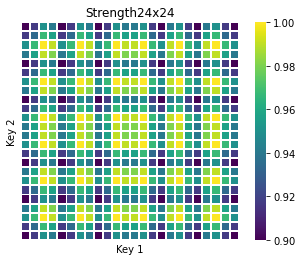

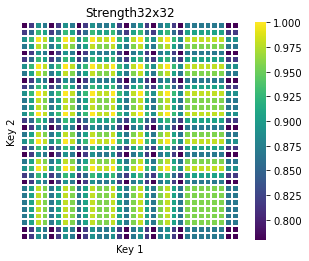

In [8]:
# %load code/load_strength_data.py
# Normalize by the highest peak force (middle finger):
middle_force = 2.36
index_force = 2.26
ring_force = 2.02
little_force = 1.84
middle_norm = 1.0
index_norm = index_force / middle_force
ring_norm = ring_force / middle_force
little_norm = little_force / middle_force
print('index/middle: {0}'.format(index_norm))
print('ring/middle: {0}'.format(ring_norm))
print('little/middle: {0}'.format(little_norm))

# Relative left/right hand strength (assume equal):
lf = 1.0
rf = 1.0

strengths24 = np.array((
                    lf * little_norm, lf * ring_norm, lf * middle_norm, lf * index_norm,
                    lf * little_norm, lf * ring_norm, lf * middle_norm, lf * index_norm,
                    lf * little_norm, lf * ring_norm, lf * middle_norm, lf * index_norm,
                    rf * index_norm, rf * middle_norm, rf * ring_norm, rf * little_norm,
                    rf * index_norm, rf * middle_norm, rf * ring_norm, rf * little_norm,
                    rf * index_norm, rf * middle_norm, rf * ring_norm, rf * little_norm))

# Create a finger-pair position strength matrix by adding pairs of strength values:
Strength24x24 = np.zeros((24, 24))
for i in range(24):
    Strength24x24[i,:] = strengths24
Strength24x24 = (Strength24x24 + Strength24x24.transpose())

# Normalize matrix with min-max scaling to a range with maximum = 1:
#newMin = strength_factor
newMin = min_strength_factor  # np.min(Strength24x24) / np.max(Strength24x24)
newMax = 1.0
Strength24x24 = newMin + (Strength24x24 - np.min(Strength24x24)) * (newMax - newMin) / (np.max(Strength24x24) - np.min(Strength24x24))

# Print:
print_matrix_info(matrix_data=Strength24x24, matrix_label="Strength24x24", nkeys=24, nlines=10)
heatmap(data=Strength24x24, title="Strength24x24", xlabel="Key 1", ylabel="Key 2", print_output=print_output)

# Save:
if print_output:
    file = open("Strength24x24.txt", "w+")
    file.write(str(Strength24x24))
    file.close()


penalty = 1.0  # Penalty for lateral (index, little) finger placement (1 = no penalty)

strengths32 = np.array((lf * little_norm, lf * ring_norm, lf * middle_norm, lf * index_norm,
                        lf * little_norm, lf * ring_norm, lf * middle_norm, lf * index_norm,
                        lf * little_norm, lf * ring_norm, lf * middle_norm, lf * index_norm,
                        rf * index_norm, rf * middle_norm, rf * ring_norm, rf * little_norm,
                        rf * index_norm, rf * middle_norm, rf * ring_norm, rf * little_norm,
                        rf * index_norm, rf * middle_norm, rf * ring_norm, rf * little_norm,
                        lf * index_norm * penalty, lf * index_norm * penalty, lf * index_norm * penalty,
                        rf * index_norm * penalty, rf * index_norm * penalty, rf * index_norm * penalty,
                        rf * little_norm * penalty, rf * little_norm * penalty))

# Create a finger-pair position strength matrix by adding pairs of strength values:
Strength32x32 = np.zeros((32, 32))
for i in range(32):
    Strength32x32[i,:] = strengths32
Strength32x32 = (Strength32x32 + Strength32x32.transpose())

# Normalize matrix with min-max scaling to a range with maximum = 1:
newMin = np.min(Strength32x32) / np.max(Strength32x32)
newMax = 1.0
Strength32x32 = newMin + (Strength32x32 - np.min(Strength32x32)) * (newMax - newMin) / (np.max(Strength32x32) - np.min(Strength32x32))

# Print:
print_matrix_info(matrix_data=Strength32x32, matrix_label="Strength32x32", nkeys=32, nlines=10)
heatmap(data=Strength32x32, title="Strength32x32", xlabel="Key 1", ylabel="Key 2", print_output=print_output)

# Save:
if print_output:
    file = open("Strength32x32.txt", "w+")
    file.write(str(Strength32x32))
    file.close()

## Flow matrix and Engram scoring model  <a name="flow">

The Flow24x24 matrix takes into account ease of transition between ordered pairs of keys.
    
Our optimization algorithm finds every permutation of a given set of letters, maps these letter permutations to a set of keys, and ranks these letter-key mappings according to a score reflecting ease of typing key pairs and frequency of letter pairs (bigrams). The score is the average of the scores for all possible bigrams in this arrangement. The score for each bigram is a product of the frequency of occurrence of that bigram, the frequency of each of the bigram’s characters, and flow, strength (and optional speed) factors for the key pair.

#### Dvorak et al. (1936) defined eleven criteria for the design and evaluation of keyboard layouts:
1.  Deviation from the balance of hand and finger loads should be as low as possible.
2.  Percentage of tapping with the same fingers should be as low as possible.
3.  Percentage of tapping that includes top row should be as low as possible.
4.  Percentage of tapping that includes bottom row should be as low as possible.
5.  Percentage of tapping in the home row should be as high as possible.
6.  Percentage of tapping by alternating hands should be as high as possible.
7.  Percentage of hurdles with the same finger should be as low as possible.
8.  Percentage of hurdles with adjacent offset fingers should be as low as possible.
9.  Percentage of hurdles with remote fingers should be as low as possible.
10. Percentage of reach with the same finger should be as low as possible.
11. Percentage of reach with adjacent offset fingers should be as low as possible.

#### Synopsis of above criteria for pairwise key presses when touch typing:
1. Alternate between hands.
2. Balance finger loads, and avoid using the same finger.
3. Avoid the upper and lower rows, and avoid skipping over the home row.
4. Avoid tapping adjacent offset rows with the same or adjacent offset fingers.
    
### Factors to penalize strenuous key transitions

Direction:
    
    - outward = 0.9: outward roll of fingers from the index to little finger (same hand)

Dexterity:
    
    - side_above_3away = 0.9
        - index and little finger type two keys, one or more rows apart (same hand)
    - side_above_2away = 0.9^2 = 0.81
        - index finger types key a row or two above ring finger key, or
        - little finger types key a row or two above middle finger key (same hand)
    - side_above_1away = 0.9^3 = 0.729
        - index finger types key a row or two above middle finger key, or
        - little finger types key a row or two above ring finger key (same hand)
    - middle_above_ring = 0.9
        - middle finger types key a row or two above ring finger key (same hand)
    - ring_above_middle = 0.9^3 = 0.729
        - ring finger types key a row or two above middle finger key (same hand)
    - lateral = 0.9
        - lateral movement of (index or little) finger outside of 8 vertical columns
    
Distance:
    
    - skip_row_3away = 0.9       
        - index and little fingers type two keys that skip over home row (same hand)
        - (e.g., one on bottom row, the other on top row)
    - skip_row_2away = 0.9^3 = 0.729
        - little and middle or index and ring fingers type two keys that skip over home row (same hand)
    - skip_row_1away = 0.9^5 = 0.59049
        - little and ring or middle and index fingers type two keys that skip over home row (same hand)

Repetition:
 
    - skip_row_0away = 0.9^4 = 0.6561
        - same finger types two keys that skip over home row
    - same_finger = 0.9^5 = 0.59049
        - use same finger again for a different key
        - cannot accompany outward, side_above, or adjacent_shorter_above 

Strength: Accounted for by the strength matrix (minimum value for the little finger = 0.9)    

### Example flow values for left side home block
   
No penalty (for same hand, both keys in the same row in an inward roll or repeating the same key):

    2=>2, 2=>3, 3=>4, 2=>4, 1=>4

    1  2  3  4
    5  6  7  8
    9 10 11 12

Penalty = 0.9:

    outward: 2=>1, 3=>1, 3=>2, 4=>1, 4=>2, 4=>3, 6=>5, 7=>6, 7=>5, 8=>7, 8=>6, 8=>5,... 
    middle_above_ring: 6=>3, 10=>7 
    side_above_3away: 1=>8, 5=>4, 5=>12, 9=>8
    index_above: 1=>4, 2=>4, 3=>4, 4=>4

Penalty = 0.9^2:

    middle_above_ring * outward: 3=>6, 7=>10
    side_above_3away * outward: 8=>1, 4=>5, 12=>5, 8=>9
    side_above_2away: 1=>7, 6=>4, 5=>11, 10=>8    
    skip_row_3away * side_above_3away: 1=>12, 9=>4
    skip_row_2away: 2=>12, 9=>3
    ring_above_middle 2=>7, 6=>11
    side_above_2away * outward: 7=>1, 4=>6, 11=>5, 8=>10
    side_above_1away: 1=>6, 7=>4, 5=>10, 11=>8

Penalty = 0.9^3:

    skip_row_3away * side_above_3away * outward: 12=>1, 4=>9

Penalty = 0.9^4:

    ring_above_middle * outward: 7=>2, 11=>6
    side_above_1away * outward: 4=>7, 6=>1, 10=>5, 4=>7

Penalty = 0.9^5:

    same_finger: 4=>8, 8=>4, 1=>5, 5=>1, 5=>9, 9=>5, 2=>6, 6=>2,...
    skip_row_2away * side_above_2away: 10=>4, 1=>11
    skip_row_1away: 1=>10, 9=>2, 3=>12

Penalty = 0.9^6:

    skip_row_2away * side_above_2away * outward: 4=>10, 11=>1
    skip_row_1away * outward: 10=>1, 2=>9, 12=>3

Penalty = 0.9^8

    skip_row_1away * ring_above_middle: 2=>11
    skip_row_1away * side_above_1away: 1=>10, 11=>4

Penalty = 0.9^9

    skip_row_1away * ring_above_middle * outward: 11=>2
    skip_row_0away * same_finger: 1=>9, 9=>1, 4=>12, 12=>4, 2=>10, 10=>2, 3=>11, 11=>3     
    skip_row_1away * side_above_1away * outward: 10=>1, 4=>11

Flow24x24 min = 0.387420489, max = 1.0
Flow24x24 key number pairs with minimum values:
        2 -> 10        (0.387420489)
        10 -> 1        (0.387420489)
        3 -> 11        (0.387420489)
        10 -> 2        (0.387420489)
        14 -> 22        (0.387420489)
        24 -> 16        (0.387420489)
        15 -> 23        (0.387420489)
        13 -> 21        (0.387420489)
        16 -> 24        (0.387420489)
        21 -> 13        (0.387420489)
        4 -> 11        (0.387420489)
        13 -> 22        (0.387420489)
        1 -> 9        (0.387420489)
        4 -> 12        (0.387420489)
        22 -> 15        (0.387420489)
        22 -> 14        (0.387420489)
        9 -> 1        (0.387420489)
        12 -> 4        (0.387420489)
        11 -> 2        (0.387420489)
        11 -> 3        (0.387420489)
        23 -> 15        (0.387420489)
        23 -> 16        (0.387420489)
        11 -> 4        (0.43046720999999993)
        2 -> 11        (0.43046720999999993)


<ipython-input-2-50359702f177>:543: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  min_row = np.int(np.ceil(x / nkeys))
<ipython-input-2-50359702f177>:540: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; f

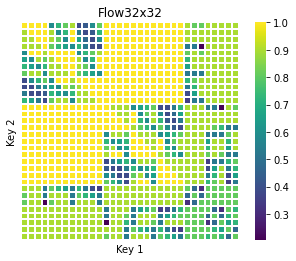

In [9]:
# %load code/load_flow_matrices.py
# Penalizing factors for 24 keys  (1 = no penalty; set to less than 1 to penalize):

# Dexterity
side_above_3away = 0.9     # index and little finger type two keys, one or more rows apart (same hand)
side_above_2away = 0.81    # index finger types key a row or two above ring finger key, or
                           # little finger types key a row or two above middle finger key (same hand)
side_above_1away = 0.729   # index finger types key a row or two above middle finger key, or
                           # little finger types key a row or two above ring finger key (same hand)
middle_above_ring = 0.9    # middle finger types key a row or two above ring finger key (same hand)
ring_above_middle = 0.729  # ring finger types key a row or two above middle finger key (same hand)
lateral = 0.9              # lateral movement of (index or little) finger outside of 8 vertical columns

# Direction
outward = 0.9              # outward roll of fingers from the index to little finger (same hand)

# Distance
skip_row_3away = 0.9       # index and little fingers type two keys that skip over home row (same hand)
                           # (e.g., one on bottom row, the other on top row)
skip_row_2away = 0.729     # little and middle or index and ring fingers type two keys that skip over home row (same hand)
skip_row_1away = 0.59049   # little and ring or middle and index fingers type two keys that skip over home row (same hand)

# Repetition
skip_row_0away = 0.6561    # same finger types two keys that skip over home row
same_finger = 0.59049      # use same finger again for a different key


# Unused or redundant parameters
same_hand = 1.0            # (addressed by splitting up the most frequent letters across left/right sides above)
not_home_row = 1.0         # at least one key not on home row
side_top = 1.0             # index or little finger types top corner key
shorter_above = 1.0        # (taken care of by side_above_[1,2,3]away parameters)
adjacent_offset = 1.0      # (taken care of by side_above_1away, middle_above_ring, ring_above_middle parameters)
inside_top = 1.0           # index finger types top corner key (taken care of by side_above_1away parameter)
index_above = 1.0          # index finger types top corner key (unless other bigram key is in the top row for the same hand)
                           # (taken care of by side_above_[1,2,3]away parameters)


def create_24x24_flow_matrix(not_home_row, side_top, side_above_3away, side_above_2away, side_above_1away, 
                             middle_above_ring, ring_above_middle, outward, skip_row_3away, 
                             skip_row_2away, skip_row_1away, skip_row_0away, same_finger, lateral, 
                             same_hand, shorter_above, adjacent_offset, inside_top, index_above):

    all_24_keys = [1,2,3,4, 5,6,7,8, 9,10,11,12, 13,14,15,16, 17,18,19,20, 21,22,23,24]

    # Create a matrix and multiply by flow factors that promote easy interkey transitions:
    T = np.ones((24, 24))

    # 7.  Promote alternating between hands over uncomfortable transitions with the same hand.
    if same_hand < 1.0:
    #    1  2  3  4   13 14 15 16  
    #    5  6  7  8   17 18 19 20 
    #    9 10 11 12   21 22 23 24
        for i in range(0,12):
            for j in range(0,12):
                T[i,j] *= same_hand
        for i in range(12,24):
            for j in range(12,24):
                T[i,j] *= same_hand

    # 8.  Promote little-to-index-finger roll-ins over index-to-little-finger outwards.
    #    1  2  3  4   13 14 15 16  
    #    5  6  7  8   17 18 19 20 
    #    9 10 11 12   21 22 23 24
    if outward < 1.0:

        # same-row roll-outs:
        roll_ins = [[1,2],[2,3],[3,4], [5,6],[6,7],[7,8], [9,10],[10,11],[11,12],
                    [16,15],[15,14],[14,13], [20,19],[19,18],[18,17], [24,23],[23,22],[22,21]]
        for x in roll_ins:
            T[x[1]-1, x[0]-1] *= outward

        # same-row roll-outs, skipping keys:
        roll_ins_skip_keys = [[1,3],[2,4],[1,4], [5,7],[6,8],[5,8], [9,11],[10,12],[9,12],
                              [16,14],[15,13],[16,13], [20,18],[19,17],[20,17], [24,22],[23,21],[24,21]]
        for x in roll_ins_skip_keys:
            T[x[1]-1, x[0]-1] *= outward

        # adjacent-row roll-outs:
        roll_ins_adj_rows = [[1,6],[1,7],[1,8],[2,7],[2,8],[3,8], [5,2],[5,3],[5,4],[6,3],[6,4],[7,4],
                             [5,10],[5,11],[5,12],[6,11],[6,12],[7,12], [9,6],[9,7],[9,8],[10,7],[10,8],[11,8],
                             [16,19],[16,18],[16,17],[15,18],[15,17],[14,17], [20,15],[20,14],[20,13],[19,14],[19,13],[18,13],
                             [20,23],[20,22],[20,21],[19,22],[19,21],[18,21], [24,19],[24,18],[24,17],[23,18],[23,17],[22,17]]
        for x in roll_ins_adj_rows:
            T[x[1]-1, x[0]-1] *= outward

        # upper<->lower row roll-outs:
        roll_ins_skip_home = [[1,10],[1,11],[1,12],[2,11],[2,12],[3,12], [9,2],[9,3],[9,4],[10,3],[10,4],[11,4],
                              [16,23],[16,22],[16,21],[15,22],[15,21],[14,21], [24,15],[24,14],[24,13],[23,14],[23,13],[22,13]]
        for x in roll_ins_skip_home:
            T[x[1]-1, x[0]-1] *= outward

    # 9.  Avoid stretching shorter fingers up and longer fingers down.
    #    1  2  3  4   13 14 15 16  
    #    5  6  7  8   17 18 19 20 
    #    9 10 11 12   21 22 23 24
    if index_above < 1.0:
        for x in [4]:
            for y in [4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]:
                T[x-1, y-1] *= index_above
                T[y-1, x-1] *= index_above
        for x in [13]:
            for y in [1,2,3,4,5,6,7,8,9,10,11,12,13,17,18,19,20,21,22,23,24]:
                T[x-1, y-1] *= index_above
                T[y-1, x-1] *= index_above
    if inside_top < 1.0:
        for x in [4,13]:
            for j in range(0,24):
                T[x-1, j] *= inside_top
                T[j, x-1] *= inside_top
    if side_top < 1.0:
        for x in [1,4,13,16]:
            for j in range(0,24):
                T[x-1, j] *= side_top
                T[j, x-1] *= side_top
    if side_above_1away < 1.0:
        for x in [1]:
            for y in [6,10]:
                T[x-1, y-1] *= side_above_1away
                T[y-1, x-1] *= side_above_1away
        for x in [5]:
            for y in [10]:
                T[x-1, y-1] *= side_above_1away
                T[y-1, x-1] *= side_above_1away
        for x in [4]:
            for y in [7,11]:
                T[x-1, y-1] *= side_above_1away
                T[y-1, x-1] *= side_above_1away
        for x in [8]:
            for y in [11]:
                T[x-1, y-1] *= side_above_1away
                T[y-1, x-1] *= side_above_1away
        for x in [13]:
            for y in [18,22]:
                T[x-1, y-1] *= side_above_1away
                T[y-1, x-1] *= side_above_1away
        for x in [17]:
            for y in [22]:
                T[x-1, y-1] *= side_above_1away
                T[y-1, x-1] *= side_above_1away
        for x in [16]:
            for y in [19,23]:
                T[x-1, y-1] *= side_above_1away
                T[y-1, x-1] *= side_above_1away
        for x in [20]:
            for y in [23]:
                T[x-1, y-1] *= side_above_1away
                T[y-1, x-1] *= side_above_1away
    if side_above_2away < 1.0:
        for x in [1]:
            for y in [7,11]:
                T[x-1, y-1] *= side_above_2away
                T[y-1, x-1] *= side_above_2away
        for x in [5]:
            for y in [11]:
                T[x-1, y-1] *= side_above_2away
                T[y-1, x-1] *= side_above_2away
        for x in [4]:
            for y in [6,10]:
                T[x-1, y-1] *= side_above_2away
                T[y-1, x-1] *= side_above_2away
        for x in [8]:
            for y in [10]:
                T[x-1, y-1] *= side_above_2away
                T[y-1, x-1] *= side_above_2away
        for x in [13]:
            for y in [19,23]:
                T[x-1, y-1] *= side_above_2away
                T[y-1, x-1] *= side_above_2away
        for x in [17]:
            for y in [23]:
                T[x-1, y-1] *= side_above_2away
                T[y-1, x-1] *= side_above_2away
        for x in [16]:
            for y in [18,22]:
                T[x-1, y-1] *= side_above_2away
                T[y-1, x-1] *= side_above_2away
        for x in [20]:
            for y in [22]:
                T[x-1, y-1] *= side_above_2away
                T[y-1, x-1] *= side_above_2away
    if side_above_3away < 1.0:
        for x in [1]:
            for y in [8,12]:
                T[x-1, y-1] *= side_above_3away
                T[y-1, x-1] *= side_above_3away
        for x in [5]:
            for y in [12]:
                T[x-1, y-1] *= side_above_3away
                T[y-1, x-1] *= side_above_3away
        for x in [4]:
            for y in [5,9]:
                T[x-1, y-1] *= side_above_3away
                T[y-1, x-1] *= side_above_3away
        for x in [8]:
            for y in [9]:
                T[x-1, y-1] *= side_above_3away
                T[y-1, x-1] *= side_above_3away
        for x in [13]:
            for y in [20,24]:
                T[x-1, y-1] *= side_above_3away
                T[y-1, x-1] *= side_above_3away
        for x in [17]:
            for y in [24]:
                T[x-1, y-1] *= side_above_3away
                T[y-1, x-1] *= side_above_3away
        for x in [16]:
            for y in [17,21]:
                T[x-1, y-1] *= side_above_3away
                T[y-1, x-1] *= side_above_3away
        for x in [20]:
            for y in [21]:
                T[x-1, y-1] *= side_above_3away
                T[y-1, x-1] *= side_above_3away
    if shorter_above < 1.0:
        for x in [1]:
            for y in [6,7,8,10,11,12]:
                T[x-1, y-1] *= shorter_above
                T[y-1, x-1] *= shorter_above
        for x in [2]:
            for y in [7,11]:
                T[x-1, y-1] *= shorter_above
                T[y-1, x-1] *= shorter_above
        for x in [4]:
            for y in [6,7,10,11]:
                T[x-1, y-1] *= shorter_above
                T[y-1, x-1] *= shorter_above

        for x in [5]:
            for y in [10,11,12]:
                T[x-1, y-1] *= shorter_above
                T[y-1, x-1] *= shorter_above
        for x in [6]:
            for y in [11]:
                T[x-1, y-1] *= shorter_above
                T[y-1, x-1] *= shorter_above
        for x in [8]:
            for y in [10,11]:
                T[x-1, y-1] *= shorter_above
                T[y-1, x-1] *= shorter_above

        for x in [16]:
            for y in [17,18,19,21,22,23]:
                T[x-1, y-1] *= shorter_above
                T[y-1, x-1] *= shorter_above
        for x in [15]:
            for y in [18,22]:
                T[x-1, y-1] *= shorter_above
                T[y-1, x-1] *= shorter_above
        for x in [13]:
            for y in [18,19,22,23]:
                T[x-1, y-1] *= shorter_above
                T[y-1, x-1] *= shorter_above

        for x in [20]:
            for y in [21,22,23]:
                T[x-1, y-1] *= shorter_above
                T[y-1, x-1] *= shorter_above
        for x in [19]:
            for y in [22]:
                T[x-1, y-1] *= shorter_above
                T[y-1, x-1] *= shorter_above
        for x in [17]:
            for y in [22,23]:
                T[x-1, y-1] *= shorter_above
                T[y-1, x-1] *= shorter_above

    if ring_above_middle < 1.0:
        ring_above_middles =  [[2,7],[6,11],[2,11],
                            [15,18],[19,22],[15,22]]
        for x in ring_above_middles:
            T[x[0]-1, x[1]-1] *= ring_above_middle
            T[x[1]-1, x[0]-1] *= ring_above_middle

    if middle_above_ring < 1.0:
        middle_above_rings =  [[6,3],[10,7],[10,3],
                            [19,14],[23,18],[23,14]]
        for x in middle_above_rings:
            T[x[0]-1, x[1]-1] *= middle_above_ring
            T[x[1]-1, x[0]-1] *= middle_above_ring

    # 10. Avoid using the same finger.
    #    1  2  3  4   13 14 15 16  
    #    5  6  7  8   17 18 19 20 
    #    9 10 11 12   21 22 23 24
    if same_finger < 1.0:
        same_fingers = [[1,5],[5,9],[1,9], [2,6],[6,10],[2,10], [3,7],[7,11],[3,11], [4,8],[8,12],[4,12],
                        [13,17],[17,21],[13,21], [14,18],[18,22],[14,22], [15,19],[19,23],[15,23], [16,20],[20,24],[16,24]] 
        for x in same_fingers:
            T[x[0]-1, x[1]-1] *= same_finger
            T[x[1]-1, x[0]-1] *= same_finger

    # 11. Avoid the upper and lower rows.
    #    1  2  3  4   13 14 15 16  
    #    5  6  7  8   17 18 19 20 
    #    9 10 11 12   21 22 23 24
    if not_home_row < 1.0:
        not_home_row_keys = [1,2,3,4, 9,10,11,12, 13,14,15,16, 21,22,23,24]
        for x in not_home_row_keys:
            for j in range(0,23):
                T[x-1, j] *= not_home_row
                T[j, x-1] *= not_home_row

    # 12. Avoid skipping over the home row.
    #    1  2  3  4   13 14 15 16  
    #    5  6  7  8   17 18 19 20 
    #    9 10 11 12   21 22 23 24
    if skip_row_0away < 1.0:
        skip_top = [1, 2, 3, 4, 13,14,15,16] 
        skip_bot = [9,10,11,12, 21,22,23,24] 
        for ix, x in enumerate(skip_top):
            y = skip_bot[ix]
            T[x-1, y-1] *= skip_row_0away
            T[y-1, x-1] *= skip_row_0away
    if skip_row_1away < 1.0:
        skip_top = [1, 2, 2, 3, 3, 4, 13,14,14,15,15,16] 
        skip_bot = [10,9,11,10,12,11, 22,21,23,22,24,23] 
        for ix, x in enumerate(skip_top):
            y = skip_bot[ix]
            T[x-1, y-1] *= skip_row_1away
            T[y-1, x-1] *= skip_row_1away
    if skip_row_2away < 1.0:
        skip_top = [1,  2,3, 4, 13,14,15,16] 
        skip_bot = [11,12,9,10, 23,24,21,22] 
        for ix, x in enumerate(skip_top):
            y = skip_bot[ix]
            T[x-1, y-1] *= skip_row_2away
            T[y-1, x-1] *= skip_row_2away
    if skip_row_3away < 1.0:
        skip_top = [1, 4, 13,16] 
        skip_bot = [12,9, 24,21] 
        for ix, x in enumerate(skip_top):
            y = skip_bot[ix]
            T[x-1, y-1] *= skip_row_3away
            T[y-1, x-1] *= skip_row_3away

    Flow24x24 = T

    # Normalize matrix with min-max scaling to a range with maximum = 1:
    newMin = np.min(Flow24x24) / np.max(Flow24x24)
    newMax = 1.0
    Flow24x24 = newMin + (Flow24x24 - np.min(Flow24x24)) * (newMax - newMin) / (np.max(Flow24x24) - np.min(Flow24x24))

    return Flow24x24

Flow24x24 = create_24x24_flow_matrix(not_home_row, side_top, 
    side_above_3away, side_above_2away, side_above_1away, middle_above_ring, ring_above_middle, outward, 
    skip_row_3away, skip_row_2away, skip_row_1away, skip_row_0away, same_finger, lateral, same_hand, 
    shorter_above, adjacent_offset, inside_top, index_above)

# Print:
print_matrix_info(matrix_data=Flow24x24, matrix_label="Flow24x24", nkeys=24, nlines=30)
heatmap(data=Flow24x24, title="Flow24x24", xlabel="Key 1", ylabel="Key 2", print_output=print_output)


def create_32x32_flow_matrix(not_home_row, side_top, side_above_3away, side_above_2away, side_above_1away, 
                             middle_above_ring, ring_above_middle, outward, skip_row_3away, 
                             skip_row_2away, skip_row_1away, skip_row_0away, same_finger, lateral, 
                             same_hand, shorter_above, adjacent_offset, inside_top, index_above):

    all_32_keys = [1,2,3,4, 5,6,7,8, 9,10,11,12, 13,14,15,16, 17,18,19,20, 21,22,23,24, 
                   25,26,27, 28,29,30, 31,32]

    # Create a matrix and multiply by flow factors that promote easy interkey transitions:
    T = np.ones((32, 32))

    if lateral < 1.0:
        for x in all_32_keys:
            for y in [25,26,27, 28,29,30, 31,32]:
                T[x-1, y-1] *= lateral
                T[y-1, x-1] *= lateral    

    # 7.  Promote alternating between hands over uncomfortable transitions with the same hand.
    if same_hand < 1.0:
        for i in [1,2,3,4,5,6,7,8,9,10,11,12, 25,26,27]:
            for j in [1,2,3,4,5,6,7,8,9,10,11,12, 25,26,27]:
                T[i-1,j-1] *= same_hand
        for i in [13,14,15,16,17,18,19,20,21,22,23,24, 28,29,30,31,32]:
            for j in [13,14,15,16,17,18,19,20,21,22,23,24, 28,29,30,31,32]:
                T[i-1,j-1] *= same_hand

    # 8.  Promote little-to-index-finger roll-ins over index-to-little-finger outsward rolls.
    # Penalize (index, little) finger lateral movements:
    #  1  2  3  4 25   28 13 14 15 16 31 
    #  5  6  7  8 26   29 17 18 19 20 32
    #  9 10 11 12 27   30 21 22 23 24
    if outward < 1.0:

        # same-row roll-outs:
        roll_ins = [[1,2],[2,3],[3,4], [5,6],[6,7],[7,8], [9,10],[10,11],[11,12],
                    [16,15],[15,14],[14,13], [20,19],[19,18],[18,17], [24,23],[23,22],[22,21]]
        for x in roll_ins:
            T[x[1]-1, x[0]-1] *= outward

        # same-row roll-outs, skipping keys:
        roll_ins_skip_keys = [[1,3],[2,4],[1,4], [5,7],[6,8],[5,8], [9,11],[10,12],[9,12],
                              [16,14],[15,13],[16,13], [20,18],[19,17],[20,17], [24,22],[23,21],[24,21]]
                              #[1,25],[2,25],[3,25],
                              #[5,26],[6,26],[7,26],
                              #[9,27],[10,27],[11,27],
                              #[16,28],[15,28],[14,28],
                              #[20,29],[19,29],[18,29],
                              #[24,30],[23,30],[22,30],
                              #[31,15],[31,14],[31,13],[31,28],
                              #[32,19],[32,18],[32,17],[32,29]]
        for x in roll_ins_skip_keys:
            T[x[1]-1, x[0]-1] *= outward

        # adjacent-row roll-outs:
        #  1  2  3  4 25   28 13 14 15 16 31 
        #  5  6  7  8 26   29 17 18 19 20 32
        #  9 10 11 12 27   30 21 22 23 24
        roll_ins_adj_rows = [[1,6],[1,7],[1,8],[2,7],[2,8],[3,8], 
                             [5,2],[5,3],[5,4],[6,3],[6,4],[7,4],
                             [5,10],[5,11],[5,12],[6,11],[6,12],[7,12], 
                             [9,6],[9,7],[9,8],[10,7],[10,8],[11,8],
                             [16,19],[16,18],[16,17],[15,18],[15,17],[14,17], 
                             [20,15],[20,14],[20,13],[19,14],[19,13],[18,13],
                             [20,23],[20,22],[20,21],[19,22],[19,21],[18,21], 
                             [24,19],[24,18],[24,17],[23,18],[23,17],[22,17]]
                             #[5,25],[6,25],[7,25],[8,25],
                             #[5,27],[6,27],[7,27],[8,27],
                             #[1,26],[2,26],[3,26],[4,26],
                             #[9,26],[10,26],[11,26],[12,26],
                             #[16,29],[15,29],[14,29],[13,29],
                             #[24,29],[23,29],[22,29],[21,29],
                             #[20,28],[19,28],[18,28],[17,28],
                             #[20,30],[19,30],[18,30],[17,30],
                             #[31,20],[31,19],[31,18],[31,17],[31,29],
                             #[32,16],[32,15],[32,14],[32,13],[32,28],
                             #[32,24],[32,23],[32,22],[32,21],[32,30]]
        for x in roll_ins_adj_rows:
            T[x[1]-1, x[0]-1] *= outward

        # upper<->lower row roll-outs:
        roll_ins_skip_home = [[1,10],[1,11],[1,12],[2,11],[2,12],[3,12],
                              [9,2],[9,3],[9,4],[10,3],[10,4],[11,4],
                              [16,23],[16,22],[16,21],[15,22],[15,21],[14,21],
                              [24,15],[24,14],[24,13],[23,14],[23,13],[22,13]]
                              #[16,30],[15,30],[14,30],[13,30],
                              #[9,25],[10,25],[11,25],[12,25],
                              #[24,28],[23,28],[22,28],[21,28],
                              #[1,27],[2,27],[3,27],[4,27], 
                              #[31,24],[31,23],[31,22],[31,21],[31,30]]
        for x in roll_ins_skip_home:
            T[x[1]-1, x[0]-1] *= outward

    # 9.  Avoid stretching shorter fingers up and longer fingers down.
    #  1  2  3  4 25   28 13 14 15 16 31 
    #  5  6  7  8 26   29 17 18 19 20 32
    #  9 10 11 12 27   30 21 22 23 24
    if index_above < 1.0:
        for x in [4]:
            for y in [4,5,6,7,8,26,9,10,11,12,27,28,13,14,15,16,31,29,17,18,19,20,32,30,21,22,23,24]:
                T[x-1, y-1] *= index_above
                T[y-1, x-1] *= index_above
        for x in [25]:
            for y in [25,5,6,7,8,26,9,10,11,12,27,28,13,14,15,16,31,29,17,18,19,20,32,30,21,22,23,24]:
                T[x-1, y-1] *= index_above
                T[y-1, x-1] *= index_above
        for x in [13]:
            for y in [1,2,3,4,25,5,6,7,8,26,9,10,11,12,27,13,29,17,18,19,20,32,30,21,22,23,24]:
                T[x-1, y-1] *= index_above
                T[y-1, x-1] *= index_above
        for x in [28]:
            for y in [1,2,3,4,25,5,6,7,8,26,9,10,11,12,27,28,29,17,18,19,20,32,30,21,22,23,24]:
                T[x-1, y-1] *= index_above
                T[y-1, x-1] *= index_above
    if inside_top < 1.0:
        for x in [4,25,28,13]:
            for j in range(0,32):
                T[x-1, j] *= inside_top
                T[j, x-1] *= inside_top
    if side_top < 1.0:
        for x in [1,4,25,28,13,16,31]:
            for j in range(0,32):
                T[x-1, j] *= side_top
                T[j, x-1] *= side_top
    if side_above_1away < 1.0:
        for x in [1]:
            for y in [6,10]:
                T[x-1, y-1] *= side_above_1away
                T[y-1, x-1] *= side_above_1away
        for x in [5]:
            for y in [10]:
                T[x-1, y-1] *= side_above_1away
                T[y-1, x-1] *= side_above_1away
        for x in [4,25]:
            for y in [7,11]:
                T[x-1, y-1] *= side_above_1away
                T[y-1, x-1] *= side_above_1away
        for x in [8,26]:
            for y in [11]:
                T[x-1, y-1] *= side_above_1away
                T[y-1, x-1] *= side_above_1away
        for x in [13,28]:
            for y in [18,22]:
                T[x-1, y-1] *= side_above_1away
                T[y-1, x-1] *= side_above_1away
        for x in [17,29]:
            for y in [22]:
                T[x-1, y-1] *= side_above_1away
                T[y-1, x-1] *= side_above_1away
        for x in [16,31]:
            for y in [19,23]:
                T[x-1, y-1] *= side_above_1away
                T[y-1, x-1] *= side_above_1away
        for x in [20,32]:
            for y in [23]:
                T[x-1, y-1] *= side_above_1away
                T[y-1, x-1] *= side_above_1away
    if side_above_2away < 1.0:
        for x in [1]:
            for y in [7,11]:
                T[x-1, y-1] *= side_above_2away
                T[y-1, x-1] *= side_above_2away
        for x in [5]:
            for y in [11]:
                T[x-1, y-1] *= side_above_2away
                T[y-1, x-1] *= side_above_2away
        for x in [4,25]:
            for y in [6,10]:
                T[x-1, y-1] *= side_above_2away
                T[y-1, x-1] *= side_above_2away
        for x in [8,26]:
            for y in [10]:
                T[x-1, y-1] *= side_above_2away
                T[y-1, x-1] *= side_above_2away
        for x in [13,28]:
            for y in [19,23]:
                T[x-1, y-1] *= side_above_2away
                T[y-1, x-1] *= side_above_2away
        for x in [17,29]:
            for y in [23]:
                T[x-1, y-1] *= side_above_2away
                T[y-1, x-1] *= side_above_2away
        for x in [16,31]:
            for y in [18,22]:
                T[x-1, y-1] *= side_above_2away
                T[y-1, x-1] *= side_above_2away
        for x in [20,32]:
            for y in [22]:
                T[x-1, y-1] *= side_above_2away
                T[y-1, x-1] *= side_above_2away
    if side_above_3away < 1.0:
        for x in [1]:
            for y in [8,12,26,27]:
                T[x-1, y-1] *= side_above_3away
                T[y-1, x-1] *= side_above_3away
        for x in [5]:
            for y in [12,27]:
                T[x-1, y-1] *= side_above_3away
                T[y-1, x-1] *= side_above_3away
        for x in [4,25]:
            for y in [5,9]:
                T[x-1, y-1] *= side_above_3away
                T[y-1, x-1] *= side_above_3away
        for x in [8,26]:
            for y in [9]:
                T[x-1, y-1] *= side_above_3away
                T[y-1, x-1] *= side_above_3away
        for x in [13,28]:
            for y in [20,24,32]:
                T[x-1, y-1] *= side_above_3away
                T[y-1, x-1] *= side_above_3away
        for x in [17,29]:
            for y in [24]:
                T[x-1, y-1] *= side_above_3away
                T[y-1, x-1] *= side_above_3away
        for x in [16,31]:
            for y in [17,21,29,30]:
                T[x-1, y-1] *= side_above_3away
                T[y-1, x-1] *= side_above_3away
        for x in [20,32]:
            for y in [21,30]:
                T[x-1, y-1] *= side_above_3away
                T[y-1, x-1] *= side_above_3away


    #  1  2  3  4 25   28 13 14 15 16 31 
    #  5  6  7  8 26   29 17 18 19 20 32
    #  9 10 11 12 27   30 21 22 23 24
    if shorter_above < 1.0:
        for x in [1]:
            for y in [6,7,8,26,10,11,12,27]:
                T[x-1, y-1] *= shorter_above
                T[y-1, x-1] *= shorter_above
        for x in [2]:
            for y in [7,11]:
                T[x-1, y-1] *= shorter_above
                T[y-1, x-1] *= shorter_above
        for x in [4]:
            for y in [6,7,10,11]:
                T[x-1, y-1] *= shorter_above
                T[y-1, x-1] *= shorter_above
        for x in [25]:
            for y in [6,7,10,11]:
                T[x-1, y-1] *= shorter_above
                T[y-1, x-1] *= shorter_above

        for x in [5]:
            for y in [10,11,12,27]:
                T[x-1, y-1] *= shorter_above
                T[y-1, x-1] *= shorter_above
        for x in [6]:
            for y in [11]:
                T[x-1, y-1] *= shorter_above
                T[y-1, x-1] *= shorter_above
        for x in [8]:
            for y in [10,11]:
                T[x-1, y-1] *= shorter_above
                T[y-1, x-1] *= shorter_above
        for x in [26]:
            for y in [10,11]:
                T[x-1, y-1] *= shorter_above
                T[y-1, x-1] *= shorter_above

        for x in [16]:
            for y in [29,17,18,19,30,21,22,23]:
                T[x-1, y-1] *= shorter_above
                T[y-1, x-1] *= shorter_above
        for x in [31]:
            for y in [29,17,18,19,30,21,22,23]:
                T[x-1, y-1] *= shorter_above
                T[y-1, x-1] *= shorter_above
        for x in [15]:
            for y in [18,22]:
                T[x-1, y-1] *= shorter_above
                T[y-1, x-1] *= shorter_above
        for x in [13]:
            for y in [18,19,22,23]:
                T[x-1, y-1] *= shorter_above
                T[y-1, x-1] *= shorter_above
        for x in [28]:
            for y in [18,19,22,23]:
                T[x-1, y-1] *= shorter_above
                T[y-1, x-1] *= shorter_above

        for x in [20]:
            for y in [30,21,22,23]:
                T[x-1, y-1] *= shorter_above
                T[y-1, x-1] *= shorter_above
        for x in [32]:
            for y in [30,21,22,23]:
                T[x-1, y-1] *= shorter_above
                T[y-1, x-1] *= shorter_above
        for x in [19]:
            for y in [22]:
                T[x-1, y-1] *= shorter_above
                T[y-1, x-1] *= shorter_above
        for x in [17]:
            for y in [22,23]:
                T[x-1, y-1] *= shorter_above
                T[y-1, x-1] *= shorter_above
        for x in [29]:
            for y in [22,23]:
                T[x-1, y-1] *= shorter_above
                T[y-1, x-1] *= shorter_above

    if ring_above_middle < 1.0:
        ring_above_middles =  [[2,7],[6,11],[2,11],
                            [15,18],[19,22],[15,22]]
        for x in ring_above_middles:
            T[x[0]-1, x[1]-1] *= ring_above_middle
            T[x[1]-1, x[0]-1] *= ring_above_middle

    if middle_above_ring < 1.0:
        middle_above_rings =  [[6,3],[10,7],[10,3],
                            [19,14],[23,18],[23,14]]
        for x in middle_above_rings:
            T[x[0]-1, x[1]-1] *= middle_above_ring
            T[x[1]-1, x[0]-1] *= middle_above_ring

    # 10. Avoid using the same finger.
    #  1  2  3  4 25   28 13 14 15 16 31 
    #  5  6  7  8 26   29 17 18 19 20 32
    #  9 10 11 12 27   30 21 22 23 24
    if same_finger < 1.0:
        same_fingers = [[1,5],[5,9],[1,9], [2,6],[6,10],[2,10], 
                        [3,7],[7,11],[3,11], [4,8],[8,12],[4,12],
                        [25,26],[26,27],[25,27], [28,29],[29,30],[28,30], [31,32],
                        [4,25],[4,26],[4,27], [8,25],[8,26],[8,27], [12,25],[12,26],[12,27],
                        [13,28],[13,29],[13,30], [17,28],[17,29],[17,30], [21,28],[21,29],[21,30],
                        [31,16],[31,20],[31,24], [32,16],[32,20],[32,24],
                        [13,17],[17,21],[13,21], [14,18],[18,22],[14,22], 
                        [15,19],[19,23],[15,23], [16,20],[20,24],[16,24]] 
        for x in same_fingers:
            T[x[0]-1, x[1]-1] *= same_finger
            T[x[1]-1, x[0]-1] *= same_finger

    # 11. Avoid the upper and lower rows.
    if not_home_row < 1.0:
        not_home_row_keys = [1,2,3,4,25, 9,10,11,12,27, 28,13,14,15,16,31, 30,21,22,23,24]
        for x in not_home_row_keys:
            for j in range(0,32):
                T[x-1, j] *= not_home_row
                T[j, x-1] *= not_home_row
                
    # 12. Avoid skipping over the home row.
    #  1  2  3  4 25   28 13 14 15 16 31 
    #  5  6  7  8 26   29 17 18 19 20 32
    #  9 10 11 12 27   30 21 22 23 24
    if skip_row_0away < 1.0:
        skip_top = [1, 2, 3, 4, 4,25,25, 28,28,13,13,14,15,16,31] 
        skip_bot = [9,10,11,12,27,12,27, 30,21,30,21,22,23,24,24] 
        for ix, x in enumerate(skip_top):
            y = skip_bot[ix]
            T[x-1, y-1] *= skip_row_0away
            T[y-1, x-1] *= skip_row_0away
    if skip_row_1away < 1.0:
        skip_top = [1, 2, 2, 3, 3, 4, 4,25, 28,13,13,14,14,15,15,16,31] 
        skip_bot = [10,9,11,10,12,11,27,11, 22,30,22,21,23,22,24,23,23] 
        for ix, x in enumerate(skip_top):
            y = skip_bot[ix]
            T[x-1, y-1] *= skip_row_1away
            T[y-1, x-1] *= skip_row_1away
    if skip_row_2away < 1.0:
        skip_top = [1,  2,3, 4,25, 28,13,14,15,16,31] 
        skip_bot = [11,12,9,10,10, 23,23,24,21,22,22] 
        for ix, x in enumerate(skip_top):
            y = skip_bot[ix]
            T[x-1, y-1] *= skip_row_2away
            T[y-1, x-1] *= skip_row_2away
    if skip_row_3away < 1.0:
        skip_top = [1, 4,25, 28,13,16,16,31,31] 
        skip_bot = [12,9, 9, 24,24,21,30,21,30] 
        for ix, x in enumerate(skip_top):
            y = skip_bot[ix]
            T[x-1, y-1] *= skip_row_3away
            T[y-1, x-1] *= skip_row_3away
                
    Flow32x32 = T

    # Normalize matrix with min-max scaling to a range with maximum = 1:
    newMin = np.min(Flow32x32) / np.max(Flow32x32)
    newMax = 1.0
    Flow32x32 = newMin + (Flow32x32 - np.min(Flow32x32)) * (newMax - newMin) / (np.max(Flow32x32) - np.min(Flow32x32))

    return Flow32x32

Flow32x32 = create_32x32_flow_matrix(not_home_row, side_top, 
    side_above_3away, side_above_2away, side_above_1away, middle_above_ring, ring_above_middle, outward, 
    skip_row_3away, skip_row_2away, skip_row_1away, skip_row_0away, same_finger, lateral, same_hand, 
    shorter_above, adjacent_offset, inside_top, index_above)

# Print:
print_matrix_info(matrix_data=Flow32x32, matrix_label="Flow32x32", nkeys=32, nlines=30)
heatmap(data=Flow32x32, title="Flow32x32", xlabel="Key 1", ylabel="Key 2", print_output=print_output)


## Combine Strength and Flow matrices  <a name="strengthflow">

Factors24x24 min = 0.3486784401, max = 1.0
Factors24x24 key number pairs with minimum values:
        9 -> 1        (0.3486784401)
        1 -> 9        (0.3486784401)
        24 -> 16        (0.3486784401)
        16 -> 24        (0.3486784401)
        10 -> 1        (0.3553837947173077)
        23 -> 16        (0.3553837947173077)
        2 -> 10        (0.3620891493346154)
        23 -> 15        (0.3620891493346154)
        15 -> 23        (0.3620891493346154)
        10 -> 2        (0.3620891493346154)
        22 -> 15        (0.3747548191673077)
        11 -> 2        (0.3747548191673077)
        21 -> 13        (0.37997009498076917)
        12 -> 4        (0.37997009498076917)
        13 -> 21        (0.37997009498076917)
        4 -> 12        (0.37997009498076917)
        13 -> 22        (0.3836952919903846)
        4 -> 11        (0.3836952919903846)
        22 -> 14        (0.387420489)
        14 -> 22        (0.387420489)
        11 -> 3        (0.387420489)
        3 -> 1

<ipython-input-2-50359702f177>:540: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  min_row = np.int(np.ceil(x / nkeys)) + 1
<ipython-input-2-50359702f177>:543: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.2

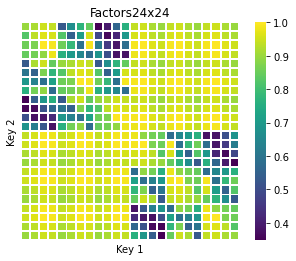

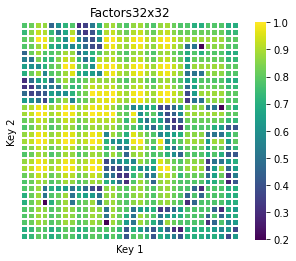

In [10]:
# %load code/combine_scoring_matrices.py
# 24 keys:
Factors24x24 = Flow24x24
if apply_strength:
    Factors24x24 = Strength24x24 * Factors24x24

# Print:
print_matrix_info(matrix_data=Factors24x24, matrix_label="Factors24x24", nkeys=24, nlines=30)
heatmap(data=Factors24x24, title="Factors24x24", xlabel="Key 1", ylabel="Key 2", print_output=print_output)

# Save:
if print_output:
    file = open("Factors24x24.txt", "w+")
    file.write(str(Factors24x24))
    file.close()


# 32 keys:
Factors32x32 = Flow32x32
if apply_strength:
    Factors32x32 = Strength32x32 * Factors32x32

# Print:
print_matrix_info(matrix_data=Factors32x32, matrix_label="Factors32x32", nkeys=32, nlines=30)
heatmap(data=Factors32x32, title="Factors32x32", xlabel="Key 1", ylabel="Key 2", print_output=print_output)

# Save:
if print_output:
    file = open("Factors32x32.txt", "w+")
    file.write(str(Factors32x32))
    file.close()

## Four steps

We will assign letters to keys by choosing the arrangement with the highest score according to our scoring model. However, there are over four hundred septillion, or four hundred trillion trillion (26! = 403,291,461,126,605,635,584,000,000, or 4.032914611 E+26) possible arrangements of 26 letters (24! = 6.204484017 E+23), so we will arrange the letters in four steps, based on ergonomics principles. These consist of (Step 1) assigning the eight most frequent letters to different keys, optimizing assignment of the remaining (Step 2) eight most frequent letters, and (Step 3) eight least frequent letters (besides Z and Q), and (Step 4) exchanging letters. 

## Step 1: Define the shape of the key layout to minimize lateral finger movements<a name="step1">

We will assign 24 letters to 8 columns of keys separated by two middle columns reserved for punctuation. These 8 columns require no lateral finger movements when touch typing, since there is one column per finger. The most comfortable keys include the left and right home rows (keys 5-8 and 17-20), the top-center keys (2,3 and 14,15) that allow the longer middle and ring fingers to uncurl upwards, as well as the bottom corner keys (9,12 and 21,24) that allow the shorter fingers to curl downwards. We will assign the two least frequent letters, W and K, to the two hardest-to-reach keys lying outside the 24-key columns in the upper right (25 and 26):

        Left:            Right:
     1  2  3  4       13 14 15 16 25
     5  6  7  8       17 18 19 20 26
     9 10 11 12       21 22 23 24

We will consider the most comfortable keys to be those typed by either hand on the home row, by the ring and middle finger above the home row, and by the index and little finger below the home row, with a preference for the strongest (index and middle) fingers:
    
     -  2  3  -        - 14 15  -  
     5  6  7  8       17 18 19 20  
     9  -  - 12       21  -  - 24

## Step 2: Arrange the most frequent letters based on comfort and bigram frequencies  <a name="step2">

Below, we will arrange vowels on one side and the most frequent consonants to the other side to encourage balance and alternation across hands. Since aside from the letters W and K there is symmetry across left and right sides, we will decide later which side the vowels and which side the most frequent consonants should go.

### Vowels
    
**E, A, O**, S, N, **I**, R, L, D, C, T, U, P, M, B, G, V, Q, H, F, Y, J, Z, X, K, W
                         
The highest frequency bigrams that contain two vowels with more than 100,000 instances:

    UE  985764
    IO  796173
    IA  631386
    IE  490356
    AE  369819
    EA  338302
    OE  317708
    OA  229658
    AU  180953
    UA  163664
    UI  151905
    EU  150552
    AI  147221
    AO  105185
    
We will assign the most frequent vowels (E=10912000, A=10301872, O=7398419, I=5694616) to four of the six most comfortable keys on the left side of the keyboard (keys 2,3,5,6,7,8). We will assign the letter E, the most frequent in the Spanish language, to the strongest (middle) finger on the home row, and assign the other three vowels such that (1) the home row keys typed by the index and middle fingers are not left vacant, and any top-frequency bigram (more than 40,000 instances, 1/50th of the highest, DE) (2) does not use the same finger and (3) reads from left to right (ex: UE, not EU) for ease of typing (inward roll from little to index finger vs. outward roll from index to little finger). These constraints lead to 4 arrangements of the 4 vowels:

    - - O -    - - O -    - O - -    - - - -    
    - I E A    I - E A    I - E A    I O E A
    - - - -    - - - -    - - - -    - - - -

### Consonants

E, A, O, **S, N**, I, **R, L, D, C, T**, U, P, M, B, G, V, Q, H, F, Y, J, Z, X, K, W

On the right side of the keyboard, we will assign four of the seven most frequent consonants (S=6128524, N=5838540, R=5450913, L=4808679, D=4237020, C=3648080, T=3643515) to the four home row keys. We will assign the letter S, the most frequent consonant in the Spanish language, to the strongest (middle) finger on the home row. As with the left side, letters are placed so that top-frequency bigrams (more than 100,000 instances) read from right to left (ex: ND, not DN) except when both sequences have more than 100,000 instances (such as TR and RT), for ease of typing. Consonant pairs that don't have a top-frequency bigram include:  

    NT  989505
    ST  776851
    ND  526709 
    TR  487365
    SD  485361
    NC  449161
    SC  326202
    NS  288679   
    RT  262674
    NL  233697
    RD  183487       
    CT  163410
    LD  162178   
    RS  153332
    RL  147398
    LT  146961
    LC  144473
    RC  140985
    SL  124408
    CR  112206
    RN  102872
        
The above constraints lead to 4 arrangements of the consonants:

    - - - -    - - - -    - - - -    - - - -
    D S N R    L S N R    C S N R    T S N R
    - - - -    - - - -    - - - -    - - - -

The resulting 16 initial layouts, each with 16 unassigned keys, are represented below with the three rows on the left and right side of the keyboard as a linear string of letters, with unassigned keys denoted by “-”.
    
    --O- -IEA ----    ---- DSNR ----
    --O- I-EA ----    ---- DSNR ----
    -O-- I-EA ----    ---- DSNR ----
    ---- IOEA ----    ---- DSNR ----

    --O- -IEA ----    ---- LSNR ----
    --O- I-EA ----    ---- LSNR ----
    -O-- I-EA ----    ---- LSNR ----
    ---- IOEA ----    ---- LSNR ----

    --O- -IEA ----    ---- CSNR ----
    --O- I-EA ----    ---- CSNR ----
    -O-- I-EA ----    ---- CSNR ----
    ---- IOEA ----    ---- CSNR ----

    --O- -IEA ----    ---- TSNR ----
    --O- I-EA ----    ---- TSNR ----
    -O-- I-EA ----    ---- TSNR ----
    ---- IOEA ----    ---- TSNR ----

###### Step 3: Optimize assignment of the remaining letters <a name="step3">
    
We want to assign letters to the 16 unassigned keys in each of the above 32 layouts based on our scoring model. That would mean scoring all possible arrangements for each layout and choosing the arrangement with the highest score, but since there are over 20 trillion (16!) possible ways of arranging 16 letters, we will break up the assignment into two stages for the most frequent and least frequent remaining letters. 
    
### Most frequent letters
We will compute scores for every possible arrangement of the seven most frequent of the remaining letters (in bold below) assigned to vacancies among the most comfortable sixteen keys.

E, A, O, S, N, I, R, **L, D, C, T, U, P, M, B, G**, V, Q, H, F, Y, J, Z, X, K, W

        Left:            Right:
     -  2  3  -        - 14 15  -
     5  6  7  8       17 18 19 20
     9  -  - 12       21  -  - 24

Since there are 40,320 (8!) possible combinations of eight letters for each of the 32 layouts, we need to score and evaluate 80,640 layouts. To score each arrangement of letters, we construct a frequency matrix where we multiply a matrix containing the frequency of each ordered pair of letters (bigram) by our flow and strength matrices to compute a score.
    
### Least frequent letters
Next we will compute scores for every possible (40,320 = 8!) arrangement of the least frequent eight letters (in bold below, besides W and K) in the remaining keys, after substituting in the 32 top results of the above, resulting in 1,290,240 layouts:

E, A, O, S, N, I, R, L, D, C, T, U, P, M, B, G, **V, Q, H, F, Y, J, Z, X**, K, W

        Left:            Right:
     1  -  -  4       13  -  - 16
     -  -  -  -        -  -  -  -
     - 10 11  -        - 22 23  -
     
### Further optimize layouts by exchanging more letters

If we relax the above fixed initializations and permit further exchange of letters, then we can search for even higher-scoring layouts. As a final optimization step we exchange letters, eight keys at a time (8! = 40,320) selected twice in 14 different ways, in each of the above 32 layouts, to score a total of over 36 million combinations. We allow the following keys to exchange letters:

    1. Top rows
    2. Bottom rows
    3. Top and bottom rows on the right side
    4. Top and bottom rows on the left side
    5. Top right and bottom left rows
    6. Top left and bottom right rows
    7. Center of the top and bottom rows on both sides
    8. The eight corners
    9. Left half of the top and bottom rows on both sides
    10. Right half of the top and bottom rows on both sides
    11. Left half of non-home rows on the left and right half of the same rows on the right
    12. Right half of non-home rows on the left and left half of the same rows on the right
    13. Top center and lower sides
    14. Top sides and lower center
    15. Repeat 1-14

In [ ]:
"""
NOTE: This procedure takes hours to run.

    --O- -IEA ----    ---- DSNR ----
    --O- I-EA ----    ---- DSNR ----
    -O-- I-EA ----    ---- DSNR ----
    ---- IOEA ----    ---- DSNR ----

    --O- -IEA ----    ---- LSNR ----
    --O- I-EA ----    ---- LSNR ----
    -O-- I-EA ----    ---- LSNR ----
    ---- IOEA ----    ---- LSNR ----

    --O- -IEA ----    ---- CSNR ----
    --O- I-EA ----    ---- CSNR ----
    -O-- I-EA ----    ---- CSNR ----
    ---- IOEA ----    ---- CSNR ----

    --O- -IEA ----    ---- TSNR ----
    --O- I-EA ----    ---- TSNR ----
    -O-- I-EA ----    ---- TSNR ----
    ---- IOEA ----    ---- TSNR ----
"""
fixed_letter_lists1 = [
    ['O','I','E','A','L','S','N','R'],
    ['O','I','E','A','L','S','N','R'],
    ['O','I','E','A','L','S','N','R'],
    ['I','O','E','A','L','S','N','R'],
    ['O','I','E','A','D','S','N','R'],
    ['O','I','E','A','D','S','N','R'],
    ['O','I','E','A','D','S','N','R'],
    ['I','O','E','A','D','S','N','R'],
    ['O','I','E','A','C','S','N','R'],
    ['O','I','E','A','C','S','N','R'],
    ['O','I','E','A','C','S','N','R'],
    ['I','O','E','A','C','S','N','R'],
    ['O','I','E','A','T','S','N','R'],
    ['O','I','E','A','T','S','N','R'],
    ['O','I','E','A','T','S','N','R'],
    ['I','O','E','A','T','S','N','R']]

# Keys for step 1:
#     -  2  3  -        - 14 15  -
#     5  6  7  8       17 18 19 20
#     9  -  - 12       21  -  - 24
keys1  = [2,3,   5,6,7,8, 9,12,  14,15, 17,18,19,20, 21,24]

# Indices for step 1:
#     -  0  1  -        -  8  9  -
#     2  3  4  5       10 11 12 13
#     6  -  -  7       14  -  - 15
fixed_letter_index_lists1 = [[1,   3,4,5, 10,11,12,13],
                             [1, 2,  4,5, 10,11,12,13],
                             [0, 2,  4,5, 10,11,12,13],
                             [   2,3,4,5, 10,11,12,13],
                             [1,   3,4,5, 10,11,12,13],
                             [1, 2,  4,5, 10,11,12,13],
                             [0, 2,  4,5, 10,11,12,13],
                             [   2,3,4,5, 10,11,12,13],
                             [1,   3,4,5, 10,11,12,13],
                             [1, 2,  4,5, 10,11,12,13],
                             [0, 2,  4,5, 10,11,12,13],
                             [   2,3,4,5, 10,11,12,13],
                             [1,   3,4,5, 10,11,12,13],
                             [1, 2,  4,5, 10,11,12,13],
                             [0, 2,  4,5, 10,11,12,13],
                             [   2,3,4,5, 10,11,12,13]]
open_letter_index_lists1  = [[0, 2,   6,7, 8,9, 14,15],
                             [0,   3, 6,7, 8,9, 14,15],
                             [1,   3, 6,7, 8,9, 14,15],
                             [0,1,    6,7, 8,9, 14,15],
                             [0, 2,   6,7, 8,9, 14,15],
                             [0,   3, 6,7, 8,9, 14,15],
                             [1,   3, 6,7, 8,9, 14,15],
                             [0,1,    6,7, 8,9, 14,15],
                             [0, 2,   6,7, 8,9, 14,15],
                             [0,   3, 6,7, 8,9, 14,15],
                             [1,   3, 6,7, 8,9, 14,15],
                             [0,1,    6,7, 8,9, 14,15],
                             [0, 2,   6,7, 8,9, 14,15],
                             [0,   3, 6,7, 8,9, 14,15],
                             [1,   3, 6,7, 8,9, 14,15],
                             [0,1,    6,7, 8,9, 14,15]]

# All 24 key indices:
#     0  1  2  3       12 13 14 15
#     4  5  6  7       16 17 18 19
#     8  9 10 11       20 21 22 23
# Open indices:
#     0  -  -  3       12  -  - 15
#     -  -  -  -        -  -  -  -
#     -  9 10  -        - 21 22  -
fixed_letter_indices2 = [1,2, 4,5,6,7, 8,11, 13,14, 16,17,18,19, 20,23]
open_letter_indices2  = [0,3, 9,10, 12,15, 21,22]
fixed_letter_index_lists3 = [[2,   5,6,7, 16,17,18,19],
                             [2, 4,  6,7, 16,17,18,19],
                             [1, 4,  6,7, 16,17,18,19],
                             [   4,5,6,7, 16,17,18,19],
                             [2,   5,6,7, 16,17,18,19],
                             [2, 4,  6,7, 16,17,18,19],
                             [1, 4,  6,7, 16,17,18,19],
                             [   4,5,6,7, 16,17,18,19],
                             [2,   5,6,7, 16,17,18,19],
                             [2, 4,  6,7, 16,17,18,19],
                             [1, 4,  6,7, 16,17,18,19],
                             [   4,5,6,7, 16,17,18,19],
                             [2,   5,6,7, 16,17,18,19],
                             [2, 4,  6,7, 16,17,18,19],
                             [1, 4,  6,7, 16,17,18,19],
                             [   4,5,6,7, 16,17,18,19]]

# Loop through initialized layouts with assigned vowels and consonants 
top_layouts = []
nlists = len(fixed_letter_lists1)
for ilist, fixed_letters1 in enumerate(fixed_letter_lists1):
    fixed_letter_indices1 = fixed_letter_index_lists1[ilist]
    fixed_letter_indices3 = fixed_letter_index_lists3[ilist]
    open_letter_indices1 = open_letter_index_lists1[ilist]

    print('Layout {0}'.format(ilist+1))
    print(*fixed_letters1)

    print("Most frequent letters")
    top_permutation1, top_score1, letter_permutations1 = permute_optimize_keys(fixed_letters1, fixed_letter_indices1, 
                                                         open_letter_indices1, letters24, keys1, Factors24x24, 
                                                         bigrams, bigram_frequencies, min_score=0, verbose=False)
    fixed_letters2 = top_permutation1
    
    print("Least frequent remaining letters")
    top_permutation2, top_score2, letter_permutations2 = permute_optimize_keys(fixed_letters2, fixed_letter_indices2, 
                                                         open_letter_indices2, letters24, keys24, Factors24x24, 
                                                         bigrams, bigram_frequencies, min_score=0, verbose=False)
    fixed_letters3 = top_permutation2

    print("Further optimize layouts by exchanging sets of letters")
    top_permutation3, top_score3 = exchange_letters(fixed_letters3, fixed_letter_indices3, letters24, keys24, 
                                                    Factors24x24, bigrams, bigram_frequencies, verbose=True)

    top_layouts.append(top_permutation3)


Layout 1
O I E A L S N R
Most frequent letters





### Load optimized layouts (outcome of above)

In [29]:
load_top_layouts = True
print_layouts = False
if load_top_layouts:
    top_layouts = [
        ['H','Y','O','Z','L','I','A','E','J','Q','X','U','P','M','G','B','D','S','N','R','T','C','V','F'],
        ['H','Y','O','Z','L','I','E','A','F','Q','X','U','P','M','B','J','D','S','N','R','T','C','G','V'],
        ['Y','F','O','Z','I','L','A','E','J','Q','X','U','P','M','G','B','D','S','N','R','T','C','V','H'],
        ['H','F','O','Z','I','L','E','A','Y','Q','X','U','P','M','B','J','D','S','N','R','T','C','G','V'],
        ['H','O','Y','Z','I','L','A','E','J','Q','X','U','P','M','G','B','D','S','N','R','T','C','V','F'],
        ['Z','O','H','F','I','L','E','A','Y','Q','X','U','P','M','B','J','D','S','N','R','T','C','G','V'],
        ['Y','F','L','Z','I','O','E','A','J','Q','X','U','P','M','B','V','D','S','N','R','T','C','G','H'],
        ['F','Y','O','Z','D','I','A','E','B','Q','X','U','M','P','G','J','L','S','N','R','T','C','H','V'],
        ['H','Y','O','Z','D','I','E','A','F','Q','X','U','M','P','B','J','L','S','N','R','T','C','V','G'],
        ['H','B','O','Z','I','D','A','E','Y','Q','X','U','M','P','G','J','L','S','N','R','T','C','V','F'],
        ['Y','P','O','Z','I','D','E','A','G','Q','X','U','M','C','B','H','L','S','N','R','T','V','J','F'],
        ['Y','O','F','Z','I','D','A','E','J','Q','X','U','M','P','B','G','L','S','N','R','T','C','H','V'],
        ['Y','O','P','F','I','D','E','A','Z','Q','X','U','M','C','B','H','L','S','N','R','T','G','J','V'],
        ['Y','H','D','Z','I','O','E','A','P','Q','X','U','M','C','B','J','L','S','N','R','T','G','V','F']
    ]
if print_layouts:
    print('Layouts:\n')
    for layout in top_layouts:
        print(layout)

### Rank optimized layouts

In [30]:
# %load code/rank_layouts.py
layout_strings = []
scores = []
for layout in top_layouts:
    layout_string = ' '.join(layout)
    score = score_layout(Factors24x24, layout, bigrams, bigram_frequencies, verbose=False)
    #print('    {0}    {1}'.format(layout_string, score))
    layout_strings.append(layout_string)
    scores.append(score)

# Establish which layouts are within a small difference of the top-scoring layout 
scores_sorted, ranks_sorted, Isort = rank_within_epsilon(scores, factor24, factor=True, verbose=False)
layouts_sorted = []
layout_strings_sorted = []
for i in Isort:
    layouts_sorted.append(top_layouts[i])
    layout_strings_sorted.append(layout_strings[i])
print('\n    (#) Rank                                                Score')
for i, rank in enumerate(ranks_sorted):
    print('    ({0}) {1}:  {2}    {3}'.format(i+1, rank, layout_strings_sorted[i], scores_sorted[i]))

print('\nLayouts tied for first place, with relative letter frequencies:\n')
#print('    Rank                                                   Score')
first_ranks = []
first_layouts = []
first_layout_strings = []
first_scores = []
for i, rank in enumerate(ranks_sorted):
    if rank == 1:
        first_ranks.append(rank)
        first_layouts.append(layout_strings_sorted[i])
        first_layout_strings.append(layouts_sorted[i])
        first_scores.append(scores_sorted[i])    
Isort2 = np.argsort([-x for x in first_scores])
first_ranks_sorted = []
first_layouts_sorted = []
first_layout_strings_sorted = []
first_scores_sorted = []
for i in Isort2:
    first_ranks_sorted.append(first_ranks[i])
    first_layouts_sorted.append(first_layouts[i])
    first_layout_strings_sorted.append(first_layout_strings[i])
    first_scores_sorted.append(first_scores[i])
#for i, first_layout in enumerate(first_layouts):
#    print('    {0}:  {1}    {2}'.format(first_ranks_sorted[i], 
#                                        first_layout,  # first_layout_strings_sorted[i], 
#                                        first_scores_sorted[i]))

# Print layouts:
for i, layout_string in enumerate(first_layout_strings_sorted):
    layout = first_layouts_sorted[i]
    print('    Layout {0}:\n'.format(Isort2[i] + 1))
    print_layout24(layout_string)
    print('')
    print_layout24_instances(layout_string, letters24, instances24, bigrams, bigram_frequencies)
    print('')


    (#) Rank                                                Score
    (1) 1:  H Y O Z L I E A F Q X U P M B J D S N R T C G V    0.7249331776654808
    (2) 2:  H Y O Z D I E A F Q X U M P B J L S N R T C V G    0.7248539514141813
    (3) 2:  H F O Z I L E A Y Q X U P M B J D S N R T C G V    0.7248443087871705
    (4) 3:  Y P O Z I D E A G Q X U M C B H L S N R T V J F    0.7247088451619557
    (5) 3:  H Y O Z L I A E J Q X U P M G B D S N R T C V F    0.7247030704625339
    (6) 3:  Y F O Z I L A E J Q X U P M G B D S N R T C V H    0.7246678464101434
    (7) 4:  F Y O Z D I A E B Q X U M P G J L S N R T C H V    0.7246283791475601
    (8) 5:  H B O Z I D A E Y Q X U M P G J L S N R T C V F    0.7245182720237415
    (9) 6:  Z O H F I L E A Y Q X U P M B J D S N R T C G V    0.7242728385779985
    (10) 7:  Y F L Z I O E A J Q X U P M B V D S N R T C G H    0.7241142688922783
    (11) 7:  Y O P F I D E A Z Q X U M C B H L S N R T G J V    0.7241085462715913
    (12) 8:  H O Y Z I L A E 

<ipython-input-2-a6b60f179465>:521: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ranks_sorted = [np.int(x) for x in new_ranks]


### Optimized layouts after further exchange of letters, and candidate winner

We will select the layout in first place as our candidate winner.

    (#) Rank                                                Score
    (1) 1:  H Y O Z L I E A F Q X U P M B J D S N R T C G V    0.7249331776654808
    (2) 2:  H Y O Z D I E A F Q X U M P B J L S N R T C V G    0.7248539514141813
    (3) 2:  H F O Z I L E A Y Q X U P M B J D S N R T C G V    0.7248443087871705
    (4) 3:  Y P O Z I D E A G Q X U M C B H L S N R T V J F    0.7247088451619557
    (5) 3:  H Y O Z L I A E J Q X U P M G B D S N R T C V F    0.7247030704625339
    (6) 3:  Y F O Z I L A E J Q X U P M G B D S N R T C V H    0.7246678464101434
    (7) 4:  F Y O Z D I A E B Q X U M P G J L S N R T C H V    0.7246283791475601
    (8) 5:  H B O Z I D A E Y Q X U M P G J L S N R T C V F    0.7245182720237415
    (9) 6:  Z O H F I L E A Y Q X U P M B J D S N R T C G V    0.7242728385779985
    (10) 7:  Y F L Z I O E A J Q X U P M B V D S N R T C G H    0.7241142688922783
    (11) 7:  Y O P F I D E A Z Q X U M C B H L S N R T G J V    0.7241085462715913
    (12) 8:  H O Y Z I L A E J Q X U P M G B D S N R T C V F    0.7240549967210332
    (13) 9:  Y O F Z I D A E J Q X U M P B G L S N R T C H V    0.7239273733248345
    (14) 10:  Y H D Z I O E A P Q X U M C B J L S N R T G V F    0.7238281566003073

    Layout 1:

    H Y O Z  P M B J
    L I E A  D S N R
    F Q X U  T C G V

      7   7  74   3   23  22  10   4
     48  57 109 103   42  61  58  55
      7   7   2  33   36  36  10   8

    left: 45566623 (24.64%)  right: 36558349
    Total same-finger bigram frequencies:     98821259870
    Total bigram inward roll frequencies:   6142840012631

### Optional: rank variations of top-scoring layouts

As an alternative to simply choosing the candidate winner layout, we can generate variations of this layout and find those variants within a small difference of one another and select from among these variants. For this, we select keys to vary, compute scores for every combination of the letters assigned to these keys, and select among those that are tied for first place. Below we vary those keys with different letters in the layouts tied for first or second place.

    (1) 1:  H Y O Z L I E A F Q X U P M B J D S N R T C G V    0.7249331776654808
    (2) 2:  H Y O Z D I E A F Q X U M P B J L S N R T C V G    0.7248539514141813
    (3) 2:  H F O Z I L E A Y Q X U P M B J D S N R T C G V    0.7248443087871705

        1:    Y     L I     F       P M     D           G V    
        2:          D               M P     L           V G    
        2:    F     I L     Y                               
        
            H - O Z - - E A - Q X U - - B J - S N R T C - -    


In [11]:
load_variants = True
if not load_variants:

    # Candidate winner above:
    #
    #  H Y O Z  P M B J
    #  L I E A  D S N R
    #  F Q X U  T C G V

    #  H - O Z  - - B J
    #  - - E A  - S N R
    #  - Q X U  T C - -

    fixed_letters = ['H','O','Z','E','A','Q','X','U','B','J','S','N','R','T','C']
    fixed_letter_indices = [0,2,3, 6,7, 9,10,11, 14,15, 17,18,19, 20,21]
    open_letter_indices  = [1, 4,5, 8, 12,13, 16, 22,23]

    top_variant_permutation, top_variant_score, variant_letter_permutations = permute_optimize_keys(fixed_letters, 
        fixed_letter_indices, open_letter_indices, letters24, keys24, Factors24x24, 
        bigrams, bigram_frequencies, min_score=0, verbose=False)

    print(top_variant_permutation)    
    print(top_variant_score)

In [12]:
if not load_variants:

    variant_scores = []
    nletters = len(fixed_letter_indices) + len(open_letter_indices)
    layout_variant_strings = []
    for ipermutation, letter_permutation in enumerate(variant_letter_permutations):
        variant_letters = np.array(['W' for x in range(nletters)])  # KEEP to initialize!
        for imove, open_letter_index in enumerate(open_letter_indices):
            variant_letters[open_letter_index] = letter_permutation[imove]
        for ifixed, fixed_letter_index in enumerate(fixed_letter_indices):
            variant_letters[fixed_letter_index] = fixed_letters[ifixed]
        layout_variant_strings.append(variant_letters)
        # Compute the score for this permutation:
        variant_score = score_layout(data_matrix, variant_letters, 
                                     bigrams, bigram_frequencies, verbose=False)
        variant_scores.append(variant_score)
    
    layout_variants = []
    for layout_string in layout_variant_strings:
        layout = ' '.join(layout_string)
        layout_variants.append(layout)

    variant_scores_sorted, variant_ranks_sorted, Isort_variants = rank_within_epsilon(variant_scores, 
            factor24, factor=True, verbose=False)
    layout_variants_sorted = []
    layout_variant_strings_sorted = []
    for i in Isort_variants:
        layout_variants_sorted.append(layout_variants[i])
        layout_variant_strings_sorted.append(layout_variant_strings[i])

    print('    (#) Rank: Layout                                           Score')
    for i, rank in enumerate(variant_ranks_sorted):
        if rank == 1:
            print('    ({0}) {1}:  {2}    {3}'.format(i + 1, rank, 
                                                      layout_variants_sorted[i], 
                                                      variant_scores_sorted[i]))
    # Print layouts:
    Ifirst_place = []
    layout_variants_first_place = []
    layout_variant_strings_first_place = []
    for i, rank in enumerate(variant_ranks_sorted):
        if rank == 1:
            layout_string = layout_variant_strings_sorted[i]
            layout = layout_variants_sorted[i]
            print('\n    Layout {0}:\n'.format(i + 1))
            print_layout24(layout_string)
            print('')
            print_layout24_instances(layout_string, letters24, instances24, 
                                     bigrams, bigram_frequencies)

            Ifirst_place.append(i)
            layout_variants_first_place.append(layout)
            layout_variant_strings_first_place.append(layout_string)

Of the 362,880 (9!) variants, four tied for first place:

    (#) Rank: Layout                                           Score
    (1) 1:  H Y O Z P I E A G Q X U M L B J D S N R T C V F    0.72523939810228
    (2) 1:  H Y O Z P I E A F Q X U M L B J D S N R T C V G    0.7252376859003342
    (3) 1:  H Y O Z P I E A F Q X U M L B J D S N R T C G V    0.7252320769647187
    (4) 1:  H Y O Z P I E A G Q X U M L B J D S N R T C F V    0.7252286630079628

They differ in three of the nine varied positions:

                            G                           V F    
    Layout 1:

    H Y O Z  M L B J
    P I E A  D S N R
    G Q X U  T C V F

      7   7  74   3   22  48  10   4
     23  57 109 103   42  61  58  55
     10   7   2  33   36  36   8   7

    left: 43336111 (11.72%)  right: 38788861
    Total same-finger bigram frequencies:    106090282428
    Total bigram inward roll frequencies:   6394006706059

    Layout 2:

    H Y O Z  M L B J
    P I E A  D S N R
    F Q X U  T C V G

      7   7  74   3   22  48  10   4
     23  57 109 103   42  61  58  55
      7   7   2  33   36  36   8  10

    left: 43024483 (10.04%)  right: 39100489
    Total same-finger bigram frequencies:    111824509515
    Total bigram inward roll frequencies:   6374652459412

    Layout 3:

    H Y O Z  M L B J
    P I E A  D S N R
    F Q X U  T C G V

      7   7  74   3   22  48  10   4
     23  57 109 103   42  61  58  55
      7   7   2  33   36  36  10   8

    left: 43024483 (10.04%)  right: 39100489
    Total same-finger bigram frequencies:    105141579206
    Total bigram inward roll frequencies:   6321015416876

    Layout 4:

    H Y O Z  M L B J
    P I E A  D S N R
    G Q X U  T C F V

      7   7  74   3   22  48  10   4
     23  57 109 103   42  61  58  55
     10   7   2  33   36  36   7   8

    left: 43336111 (11.72%)  right: 38788861
    Total same-finger bigram frequencies:    104400322299
    Total bigram inward roll frequencies:   6329134580451

In [13]:
if load_variants:
    layout_variant_strings_first_place = [
    ['H','Y','O','Z','P','I','E','A','G','Q','X','U','M','L','B','J','D','S','N','R','T','C','V','F'],
    ['H','Y','O','Z','P','I','E','A','F','Q','X','U','M','L','B','J','D','S','N','R','T','C','V','G'],
    ['H','Y','O','Z','P','I','E','A','F','Q','X','U','M','L','B','J','D','S','N','R','T','C','G','V'],
    ['H','Y','O','Z','P','I','E','A','G','Q','X','U','M','L','B','J','D','S','N','R','T','C','F','V']]

## Step 4: Evaluate winning layout <a name="step4">
    
We evaluate the candidate winner with tests:
    
    1. Evaluate variants of the candidate winner using interkey speed estimates
    2. Evaluate sensitivity of the variants to the scoring parameters
    3. Search for higher-scoring layouts by rearranging letters

### Test 1. Evaluate variants of the candidate winner using interkey speed estimates  
Below we rescore the four winning variants that are tied for first place, replacing the factor matrix with the inter-key speed matrix.

*Note:*
    
The speed matrix contains normalized interkey stroke times derived from a published study ("Estimation of digraph costs for keyboard layout optimization", A Iseri, Ma Eksioglu, International Journal of Industrial Ergonomics, 48, 127-138, 2015). To establish which layouts are within a small difference of each other when using the speed matrix, we define an epsilon equal to 131.58 ms for a single bigram (of the 32^2 possible bigrams), where 131.58 ms is the fastest measured digraph tapping speed (30,000/228 = 131.58 ms) recorded in the above study.
    
"Digraph-tapping rate changes dramatically across the digraph types. The range is between 82 and 228 taps per 30 s. The difference is nearly three times between the slowest and the fastest digraphs. From this result it can be concluded that the assignment of letter pairs on the correct digraph keys on the keyboard can have a high impact on the typing speed."

In [36]:
test_layout_strings = layout_variant_strings_first_place

In [37]:
# %load code/test/score_speed_of_layouts.py
data_matrix_speed = Speed24x24  # SpeedSymmetric24x24
speed_scores = []
for letters in test_layout_strings:
    score = score_layout(data_matrix_speed, letters,  bigrams, bigram_frequencies, verbose = False) 
    speed_scores.append(score)

speed_scores_sorted, speed_ranks_sorted, Isort_speed = rank_within_epsilon(speed_scores, 
                                                                    epsilon, factor=False, verbose=False)
speed_layouts_sorted = []
speed_layout_strings_sorted = []
for i in Isort_speed:
    speed_layouts_sorted.append(' '.join(test_layout_strings[i]))
    speed_layout_strings_sorted.append(test_layout_strings[i])

count = 0
print('    Layout                                                  Speed score')
for i, isort_speed in enumerate(Isort_speed):
    if speed_ranks_sorted[isort_speed] == 1:
        count += 1
        if isort_speed < 9:
            s = '  '
        else:
            s = ' '
        print('    ({0}){1}{2}    {3}'.format(isort_speed+1, s, 
                                              speed_layouts_sorted[i], 
                                              speed_scores_sorted[i]))
print('    {0} of {1} layouts tied for first place'.format(count, len(test_layout_strings)))

    Layout                                                  Speed score
    (2)  H Y O Z P I E A F Q X U M L B J D S N R T C V G    0.7198404518046195
    (1)  H Y O Z P I E A G Q X U M L B J D S N R T C V F    0.7198402231415858
    (4)  H Y O Z P I E A G Q X U M L B J D S N R T C F V    0.7198229480539654
    (3)  H Y O Z P I E A F Q X U M L B J D S N R T C G V    0.7198203988230163
    4 of 4 layouts tied for first place


<ipython-input-2-a6b60f179465>:521: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ranks_sorted = [np.int(x) for x in new_ranks]


Variant 2 scores highest, but all four are still tied for first place:

    Layout                                                  Speed score
    (2)  H Y O Z P I E A F Q X U M L B J D S N R T C V G    0.7198404518046195
    (1)  H Y O Z P I E A G Q X U M L B J D S N R T C V F    0.7198402231415858
    (4)  H Y O Z P I E A G Q X U M L B J D S N R T C F V    0.7198229480539654
    (3)  H Y O Z P I E A F Q X U M L B J D S N R T C G V    0.7198203988230163
    4 of 4 layouts tied for first place

### Test 2. Evaluate sensitivity of the candidate winner to the scoring parameters

We run a test below on the variants of the candidate winner layout to see how robust they are to removal of scoring parameters. We removed each of the 11 scoring parameters one by one and ranked the new scores for the variants above. 

In [39]:
# %load code/test/remove_parameters_rescore.py
params0 = [side_above_3away, side_above_2away, side_above_1away, middle_above_ring, ring_above_middle, 
           outward, skip_row_3away, skip_row_2away, skip_row_1away, skip_row_0away, same_finger]
param_names = ['side_above_3away', 'side_above_2away', 'side_above_1away', 
               'middle_above_ring', 'ring_above_middle', 'outward', 'skip_row_3away', 
               'skip_row_2away', 'skip_row_1away', 'skip_row_0away', 'same_finger']
params_lists = []
for i in range(len(params0)):
    params_list = params0.copy()
    params_list[i] = 1.0
    params_lists.append(params_list)

for iparam, P in enumerate(params_lists):

    print('    Remove parameter {0}:'.format(param_names[iparam]))

    data_matrix_param = create_24x24_flow_matrix(not_home_row, side_top,
                                                 P[0],P[1],P[2],P[3],P[4],P[5],P[6],P[7],P[8],P[9],P[10],
                                                 1,1,1,1,1,1)
    if apply_strength:
        data_matrix_param = Strength24x24 * data_matrix_param

    param_scores = []
    for letters in test_layout_strings:
        score = score_layout(data_matrix_param, letters, bigrams, bigram_frequencies, verbose=False);
        param_scores.append(score)
            
    param_scores_sorted, param_ranks_sorted, Isort_param = rank_within_epsilon(param_scores, factor24, factor=True, verbose=False)
    param_layouts_sorted = []
    param_layout_strings_sorted = []
    for i in Isort_param:
        param_layouts_sorted.append(' '.join(test_layout_strings[i]))
        param_layout_strings_sorted.append(test_layout_strings[i])

    print('    Variant                                                 Score')
    count = 0
    for i, isort_param in enumerate(Isort_param):
        count += 1
        if param_ranks_sorted[isort_param] == 1:
            if isort_param < 9:
                s = '  '
            else:
                s = ' '
            print('    ({0}){1}{2}    {3}'.format(isort_param+1, s, 
                                                  param_layouts_sorted[i], 
                                                  param_scores_sorted[i]))
    print('    {0} of {1} layouts tied for first place'.format(count, len(test_layout_strings)))

    Remove parameter side_above_3away:
    Variant                                                 Score
    (1)  H Y O Z P I E A G Q X U M L B J D S N R T C V F    0.7281922513974131
    (4)  H Y O Z P I E A G Q X U M L B J D S N R T C F V    0.7281817723529905
    (2)  H Y O Z P I E A F Q X U M L B J D S N R T C V G    0.7281795636965034
    (3)  H Y O Z P I E A F Q X U M L B J D S N R T C G V    0.72817408357688
    4 of 4 layouts tied for first place
    Remove parameter side_above_2away:
    Variant                                                 Score
    (1)  H Y O Z P I E A G Q X U M L B J D S N R T C V F    0.730449296131692
    (2)  H Y O Z P I E A F Q X U M L B J D S N R T C V G    0.730447583929746
    (3)  H Y O Z P I E A F Q X U M L B J D S N R T C G V    0.7304416749505873
    (4)  H Y O Z P I E A G Q X U M L B J D S N R T C F V    0.7304380518809213
    4 of 4 layouts tied for first place
    Remove parameter side_above_1away:
    Variant                                

<ipython-input-2-a6b60f179465>:521: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ranks_sorted = [np.int(x) for x in new_ranks]


    Variant                                                 Score
    (1)  H Y O Z P I E A G Q X U M L B J D S N R T C V F    0.7288877303473009
    (2)  H Y O Z P I E A F Q X U M L B J D S N R T C V G    0.7288860181453551
    (3)  H Y O Z P I E A F Q X U M L B J D S N R T C G V    0.7288804092097396
    (4)  H Y O Z P I E A G Q X U M L B J D S N R T C F V    0.7288769952529839
    4 of 4 layouts tied for first place
    Remove parameter outward:
    Variant                                                 Score
    (1)  H Y O Z P I E A G Q X U M L B J D S N R T C V F    0.7376925858198247
    (4)  H Y O Z P I E A G Q X U M L B J D S N R T C F V    0.7376845951142248
    (2)  H Y O Z P I E A F Q X U M L B J D S N R T C V G    0.7376726265241155
    (3)  H Y O Z P I E A F Q X U M L B J D S N R T C G V    0.7376723681423435
    4 of 4 layouts tied for first place
    Remove parameter skip_row_3away:
    Variant                                                 Score
    (1)  H Y O Z P I E 

### Assign letters W and K and test left/right swap

Test to see if equal or higher scores are obtained for the following:

    1. Assign W and K to keys 112 and 113
    2. Swap left and right sides

In [44]:
layouts_26letters = [
    ['H','Y','O','Z','P','I','E','A','G','Q','X','U', 'M','L','B','J','D','S','N','R','T','C','V','F', "'",',','-', '"','.','?', 'W','K'],
    ['H','Y','O','Z','P','I','E','A','G','Q','X','U', 'M','L','B','J','D','S','N','R','T','C','V','F', "'",',','-', '"','.','?', 'K','W'],
    ['J','B','L','M','R','N','S','D','F','V','C','T', 'Z','O','Y','H','A','E','I','P','U','X','Q','G', "'",',','-', '"','.','?', 'W','K'],
    ['J','B','L','M','R','N','S','D','F','V','C','T', 'Z','O','Y','H','A','E','I','P','U','X','Q','G', "'",',','-', '"','.','?', 'K','W']]
data_matrix = Factors32x32
scores_26letters = []
for layout_26letters in layouts_26letters:
    scores_26letters.append(score_layout(data_matrix, layout_26letters, bigrams, bigram_frequencies, verbose=False))

scores_26letters_sorted, ranks_26letters_sorted, Isort_26letters = rank_within_epsilon(scores_26letters, 
                                                                        factor32, factor=True, verbose=False)
print('\n    Rank                                                                   Score')
for i, rank in enumerate(ranks_26letters_sorted):
    layout_string = layouts_26letters[Isort_26letters[i]]
    layout = ' '.join(layout_string)
    print('    {0}:  {1}    {2}'.format(rank, layout, scores_26letters_sorted[i]))
    
print('')
print_layout24(layouts_26letters[0])


    Rank                                                                   Score
    1:  H Y O Z P I E A G Q X U M L B J D S N R T C V F ' , - " . ? W K    0.6315284924483411
    1:  J B L M R N S D F V C T Z O Y H A E I P U X Q G ' , - " . ? W K    0.6315284472608467
    1:  H Y O Z P I E A G Q X U M L B J D S N R T C V F ' , - " . ? K W    0.6315270680131808
    1:  J B L M R N S D F V C T Z O Y H A E I P U X Q G ' , - " . ? K W    0.631526057420239

    H Y O Z  M L B J
    P I E A  D S N R
    G Q X U  T C V F


<ipython-input-2-a6b60f179465>:521: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ranks_sorted = [np.int(x) for x in new_ranks]


W above K received the highest score:

    Rank                                                                   Score
    1:  H Y O Z P I E A G Q X U M L B J D S N R T C V F ' , - " . ? W K    0.6315284924483411
    1:  J B L M R N S D F V C T Z O Y H A E I P U X Q G ' , - " . ? W K    0.6315284472608467
    1:  H Y O Z P I E A G Q X U M L B J D S N R T C V F ' , - " . ? K W    0.6315270680131808
    1:  J B L M R N S D F V C T Z O Y H A E I P U X Q G ' , - " . ? K W    0.631526057420239

The letters of the Engram layout:

    H Y O Z  M L B J W
    P I E A  D S N R K
    G Q X U  T C V F    

In [11]:
winner24 = ['H','Y','O','Z','P','I','E','A','G','Q','X','U', 'M','L','B','J','D','S','N','R','T','C','V','F']
winner32 = ['H','Y','O','Z','P','I','E','A','G','Q','X','U', 'M','L','B','J','D','S','N','R','T','C','V','F', "'",',','-', '"','.','?', 'W','K']

### Test 3. Stability test: search for higher-scoring layouts by rearranging letters

The following test is to see if allowing random sets of eight letters to rearrange in every possible combination improves the score of the winning layout. After randomly selecting eight letters from the top-scoring layout, creating layouts from every permutation of these letters, and computing their scores, we get identical results as the original layout. We repeated this test over a thousand times (40,320,000 layouts).

In [ ]:
run_stability_test = True
if run_stability_test:
    original_score = score_layout(Factors24x24, winner24, bigrams, bigram_frequencies, verbose=False)
    top_score_test3 = original_score
    nunber_of_tests = 1000
    size_random_set = 8
    indices = [0,1,2,3, 8,9,10,11, 12,13,14,15, 16,17,18,19, 20,21,22,23]
    #indices = [0,1,3, 8,9,10,11, 12,13,14,15, 21,22,23]
    #  0  1  -  3       12 13 14 15
    #  -  -  -  -        -  -  -  -
    #  8  9 10 11        - 21 22 23

    #  H Y O Z  M L B J
    #  P I E A  D S N R
    #  G Q X U  T C V F

    print(original_score)

    for i in range(nunber_of_tests):

        print(i)
        
        letters_copy = winner24.copy() 
        random_indices = []
        while np.size(random_indices) < size_random_set:
            random_index = indices[np.int( np.round( (np.size(indices) - 1) * np.random.random(1) )[0])]
            if random_index not in random_indices:
                random_indices.append(random_index)   
        for irand in random_indices:
            letters_copy[np.int(irand)] = ''

        top_permutation_test3, top_score_test3 = permute_optimize(winner24, letters_copy, letters24, keys24, 
                                                                  Factors24x24, bigrams, bigram_frequencies,                                                                   
                                                                  min_score=top_score_test3, verbose=False)

        if ''.join(top_permutation_test3) != ''.join(winner24) and top_score_test3 > original_score:
            print(top_score_test3)
            print(*top_permutation_test3)

0.72523939810228
0


<ipython-input-12-e1cfef1d390a>:26: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  random_index = indices[np.int( np.round( (np.size(indices) - 1) * np.random.random(1) )[0])]
<ipython-input-12-e1cfef1d390a>:30: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link

1
0.7252491058001925
H Y O X P I E A G Q Z U M L B J D S N R T C V F
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
0.725792068154389
H Y O Z P I E A G J X U M L B Q D S N R T C V F
38
39
40
41
42
43
44
45
0.7258117900195862
J Y O Z P I E A G Q X U C L B H T S N R D M V F
46
47
48
49
0.7259406503989978
Y H O Z P I E A G Q X U M L B J D S N C T R V F
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92


    H Y O Z P I E A G Q X U M L B J D S N R T C V F    0.72523939810228
    H V O Z P I E A G Q X U M L B J T S N R D C Y F    0.7256783048253223

    H Y O Z  M L B J
    P I E A  D S N R
    G Q X U  T C V F
        
    H V O Z  M L B J
    P I E A  T S N R 
    G Q X U  D C Y F

## Step 5: Arrange non-letter characters in easy-to-remember places <a name="step5">
    
Now that we have all 26 letters accounted for, we turn our attention to non-letter characters, taking into account frequency of punctuation and ease of recall.

### Frequency of punctuation marks

  - Statistical values of punctuation frequency in 20 English-speaking countries (Table 1): <br>
Sun, Kun & Wang, Rong. (2018). Frequency Distributions of Punctuation Marks in English: Evidence from Large-scale Corpora. English Today. 10.1017/S0266078418000512. <br> 
https://www.researchgate.net/publication/328512136_Frequency_Distributions_of_Punctuation_Marks_in_English_Evidence_from_Large-scale_Corpora
  <br>"frequency of punctuation marks attested for twenty English-speaking countries and regions... The data were acquired through GloWbE."
  "The corpus of GloWbE (2013) is a large English corpus collecting international English from the internet, containing about 1.9 billion words of text from twenty different countries. For further information on the corpora used, see https://corpus.byu.edu/."
  
  - Google N-grams and Twitter analysis: <br>
"Punctuation Input on Touchscreen Keyboards: Analyzing Frequency of Use and Costs" <br>
S Malik, L Findlater - College Park: The Human-Computer Interaction Lab. 2013 <br>
https://www.cs.umd.edu/sites/default/files/scholarly_papers/Malik.pdf <br>
 "the Twitter corpora included substantially higher punctuation use than the Google corpus,  <br>
 comprising 7.5% of characters in the mobile tweets and 7.6% in desktop versus only 4.4%...  <br>
With the Google corpus,only 6 punctuation symbols (. -’ ( ) “) appeared more frequently than [q]"

  - "Frequencies for English Punctuation Marks" by Vivian Cook <br>
http://www.viviancook.uk/Punctuation/PunctFigs.htm  <br>
 "Based on a writing system corpus some 459 thousand words long.  <br> 
 This includes three novels of different types (276 thousand words),  <br>
 selections of articles from two newspapers (55 thousand), <br> 
one bureaucratic report (94 thousand), and assorted academic papers <br>
on language topics (34 thousand). More information is in <br>
Cook, V.J. (2013) ‘Standard punctuation and the punctuation of the street’ <br>
in M. Pawlak and L. Aronin (eds.), Essential Topics in Applied Linguistics and Multilingualism,  <br>
 Springer International Publishing Switzerland (2013), 267-290"

  - "A Statistical Study of Current Usage in Punctuation": <br>
Ruhlen, H., & Pressey, S. (1924). A Statistical Study of Current Usage in Punctuation. The English Journal, 13(5), 325-331. doi:10.2307/802253

  - "Computer Languages Character Frequency"
by Xah Lee.  <br>
Date: 2013-05-23. Last updated: 2020-06-29. <br>
http://xahlee.info/comp/computer_language_char_distribution.html <br>
NOTE: biased toward C (19.8%) and Py (18.5%), which have high use of "_".

Frequency: 

             Sun:     Malik:   Ruhlen:    Cook:            Xah:
              /1M   N-gram %   /10,000   /1,000       All%  JS%   Py%

    .    42840.02      1.151       535     65.3       6.6   9.4  10.3
    ,    44189.96                  556     61.6       5.8   8.9   7.5
    "                  2.284        44     26.7       3.9   1.6   6.2
    '     2980.35      0.200        40     24.3       4.4   4.0   8.6
    -     9529.78      0.217        21     15.3       4.1   1.9   3.0
    ()    4500.81      0.140         7                7.4   9.8   8.1
    ;     1355.22      0.096        22      3.2       3.8   8.6
    z                  0.09                   -         -
    :     3221.82      0.087        11      3.4       3.5   2.8   4.7
    ?     4154.78      0.032        14      5.6       0.3
    /                  0.019                          4.0   4.9   1.1
    !     2057.22      0.013         3      3.3       0.4
    _                  0.001                         11.0   2.9  10.5
    =                                                 4.4  10.7   5.4
    *                                                 3.6   2.1
    >                                                 3.0         1.4
    $                                                 2.7   1.6
    #                                                 2.2         3.2
    {}                                                1.9   4.2
    <                                                 1.3
    &                                                 1.3
    \                                                 1.2         1.1
    []                                                0.9   1.9   1.2
    @                                                 0.8
    |                                                 0.6
    +                                                 0.6   1.9
    %                                                 0.4

### Add punctuation keys and number keys

We will assign the most frequent punctuation according to Sun, et al (2018) to the six keys in the middle two columns:  . , " ' - ? ; : () ! _

            B Y O U  '   "   L D W V Z
            C I E A  ,   .   H T S N Q
            G X J K  -   ?   R M F P

We will use the Shift key to group similar punctuation marks (separating and joining marks in the left middle column and closing marks in the right middle column):

            B Y O U  '(  ")  L D W V Z
            C I E A  ,;  .:  H T S N Q
            G X J K  -_  ?!  R M F P
 
**Separating marks (left)**: The comma separates text in lists; the semicolon can be used in place of the comma to separate items in a list (especially if these items contain commas); open parenthesis sets off an explanatory word, phrase, or sentence. 

**Joining marks (left)**: The apostrophe joins words as contractions; the hyphen joins words as compounds; the underscore joins words in cases where whitespace characters are not permitted (such as in variables or file names). 

**Closing marks (right)**: A sentence usually ends with a period, question mark, or exclamation mark. The colon ends one statement but precedes the following: an explanation, quotation, list, etc. Double quotes and close parenthesis closes a word, clause, or sentence separated by an open parenthesis.

**Number keys**: 
The numbers are flanked to the left and right by [square brackets], and {curly brackets} accessed by the Shift key. Each of the numbers is paired with a mathematical or logic symbol accessed by the Shift key:
    
    { | = ~ +   <  >   ^ & % * } \
    [ 1 2 3 4   5  6   7 8 9 0 ] /

    1: | (vertical bar or "pipe" represents the logical OR operator: 1 stroke, looks like the number one)
    2: = (equal: 2 strokes, like the Chinese character for "2")
    3: ~ (tilde: "almost equal", often written with 3 strokes, like the Chinese character for "3")
    4: + (plus: has four quadrants; resembles "4")
    5 & 6: < > ("less/greater than"; these angle brackets are directly above the other bracket keys)
    7: ^ (caret for logical XOR operator as well as exponentiation; resembles "7")
    8: & (ampersand: logical AND operator; resembles "8")
    9: % (percent: related to division; resembles "9")
    0: * (asterisk: for multiplication; resembles "0") 

The three remaining keys in many common keyboards (flanking the upper right hand corner Backspace key) are displaced in special keyboards, such as the Kinesis Advantage and Ergodox. For the top right key, we will assign the forward slash and backslash: / \\. For the remaining two keys, we will assign two symbols that in modern usage have significance in social media: the hash/pound sign and the "at sign". The hash or hashtag identifies digital content on a specific topic (the Shift key accesses the dollar sign). The "at sign" identifies a location or affiliation (such as in email addresses) and acts as a "handle" to identify users in popular social media platforms and online forums.

The resulting engram-es layout:

          { | = ~ +   <  >   ^ & % * } \
          [ 1 2 3 4   5  6   7 8 9 0 ] /

            B Y O U  '(  ")  L D W V Z
            C I E A  ,;  .:  H T S N Q
            G X J K  -_  ?!  R M F P
